In [1]:
# Importation des modules
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from scipy.stats import norm

In [2]:
# Définition de la liste d'action
d_tickers = {  # Dictionnaire pour les valeurs
    "AI.PA": {"nom": "Air liquide", "label": "Close"},
    "AIR.PA": {"nom": "Airbus", "label": "Close"},
    "ALO.PA": {"nom": "Alstom", "label": "Close"},
    "MT.AS": {"nom": "ArcelorMittal", "label": "Close"},
    "CS.PA": {"nom": "Axa", "label": "Close"},
    "BNP.PA": {"nom": "BNP Paribas", "label": "Close"},
    "EN.PA": {"nom": "Bouygues", "label": "Close"},
    "CAP.PA": {"nom": "Capgemini", "label": "Close"},
    "CA.PA": {"nom": "Carrefour", "label": "Close"},
    "ACA.PA": {"nom": "Credit agricole", "label": "Close"},
    "BN.PA": {"nom": "Danone", "label": "Close"},
    "DSY.PA": {"nom": "Dassault Systemes", "label": "Close"},
    "ENGI.PA": {"nom": "Engie", "label": "Close"},
    "EL.PA": {"nom": "EssilorLuxottica", "label": "Close"},
    "ERF.PA": {"nom": "EUROFINS SCIENTIFIC", "label": "Close"},
    "RMS.PA": {"nom": "Hermes International", "label": "Close"},
    "KER.PA": {"nom": "Kering", "label": "Close"},
    "OR.PA": {"nom": "L-Oreal", "label": "Close"},
    "LR.PA": {"nom": "Legrand", "label": "Close"},
    "MC.PA": {"nom": "LVMH", "label": "Close"},
    "ML.PA": {"nom": "Michelin", "label": "Close"},
    "ORA.PA": {"nom": "Orange", "label": "Close"},
    "RI.PA": {"nom": "Pernod Ricard", "label": "Close"},
    "PUB.PA": {"nom": "Publicis Groupe", "label": "Close"},
    "RNO.PA": {"nom": "Renault", "label": "Close"},
    "SAF.PA": {"nom": "Safran", "label": "Close"},
    "SGO.PA": {"nom": "Saint-Gobain", "label": "Close"},
    "SAN.PA": {"nom": "Sanofi", "label": "Close"},
    "SU.PA": {"nom": "Schneider Electric", "label": "Close"},
    "GLE.PA": {"nom": "Societe generale", "label": "Close"},
    #"STLA.PA": {"nom": "Stellantis", "label": "Close"},
    "STM.PA": {"nom": "STMicroelectronics", "label": "Close"},
    "TEP.PA": {"nom": "Teleperformance", "label": "Close"},
    "HO.PA": {"nom": "Thales", "label": "Close"},
    "TTE.PA": {"nom": "TotalEnergies", "label": "Close"},
    "URW.AS": {"nom": "Unibail-Rodamco-Westfield", "label": "Close"},
    "VIE.PA": {"nom": "Veolia", "label": "Close"},
    "DG.PA": {"nom": "Vinci", "label": "Close"},
    "VIV.PA": {"nom": "Vivendi", "label": "Close"},
    "WLN.PA": {"nom": "Worldline", "label": "Close"}
}

# Définition de la date de début et de fin
debut = dt.datetime(2021, 6, 1)  # Date de debut recup donnees
fin = dt.datetime(2021, 8, 31)  # Date de fin recup donnees

# Récupération des valeurs de l'action
tickers = [i for i in d_tickers.keys()]
df = web.DataReader(tickers, 'yahoo', debut, fin)

Action : Air liquide



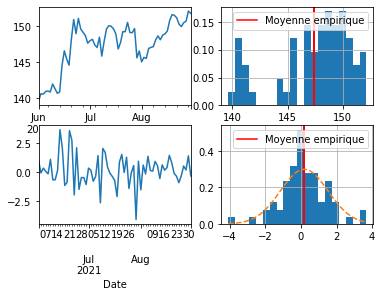

Action : Airbus



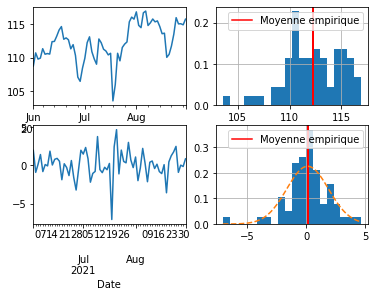

Action : Alstom



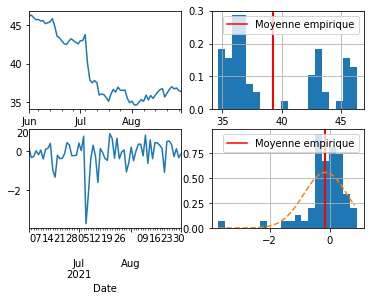

Action : ArcelorMittal



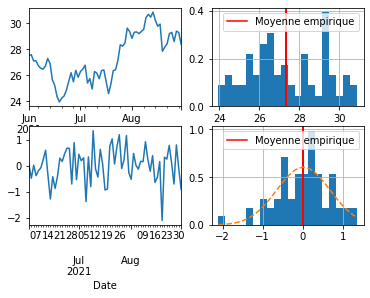

Action : Axa



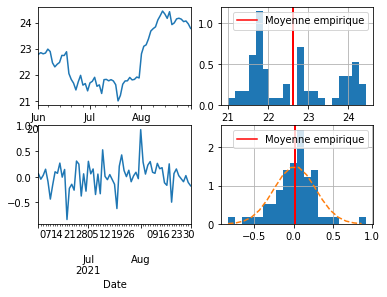

Action : BNP Paribas



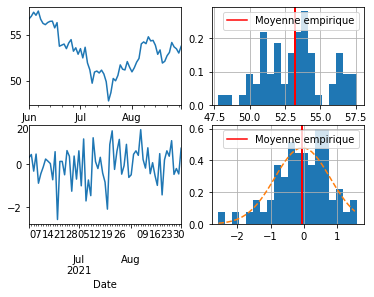

Action : Bouygues



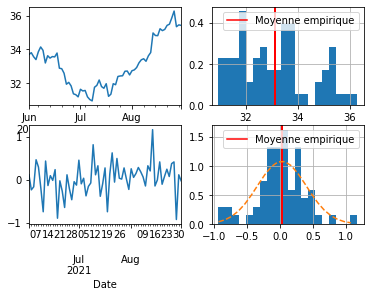

Action : Capgemini



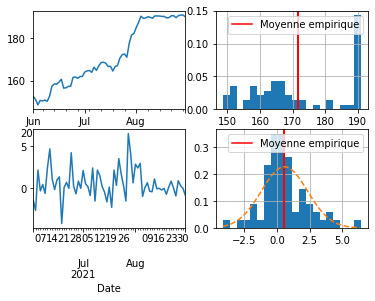

Action : Carrefour



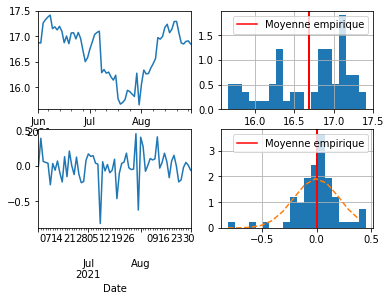

Action : Credit agricole



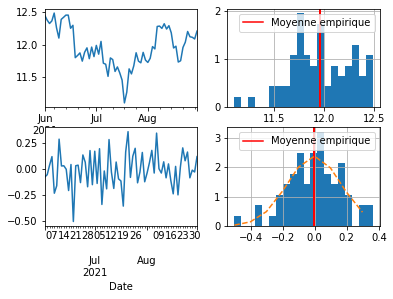

Action : Danone



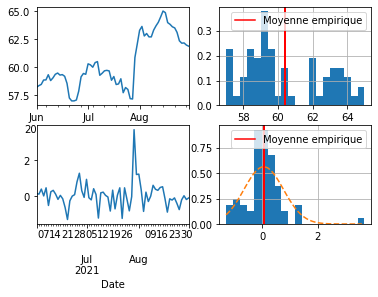

Action : Dassault Systemes



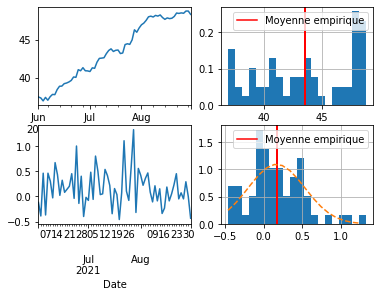

Action : Engie



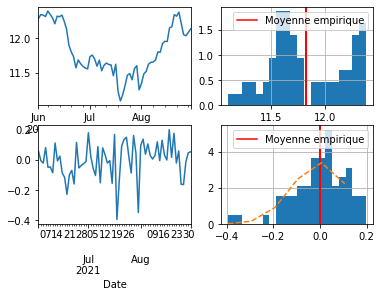

Action : EssilorLuxottica



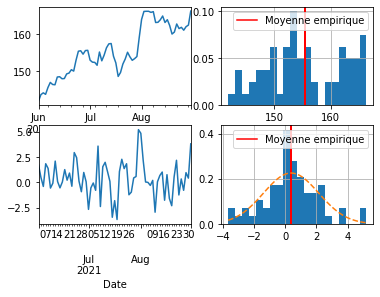

Action : EUROFINS SCIENTIFIC



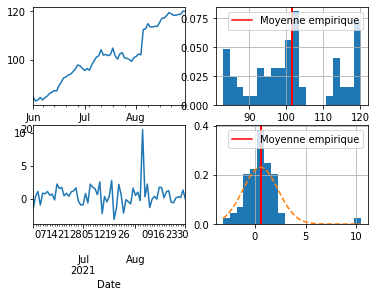

Action : Hermes International



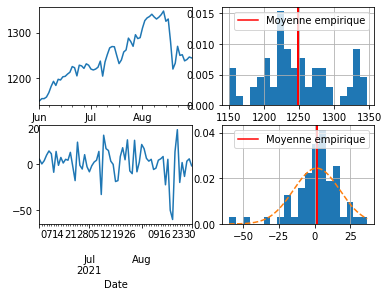

Action : Kering



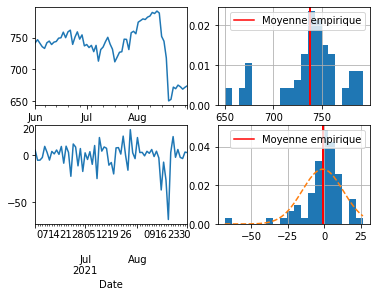

Action : L-Oreal



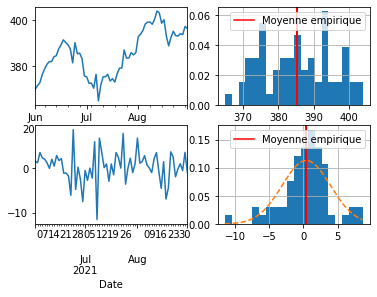

Action : Legrand



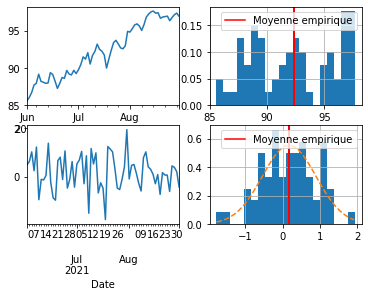

Action : LVMH



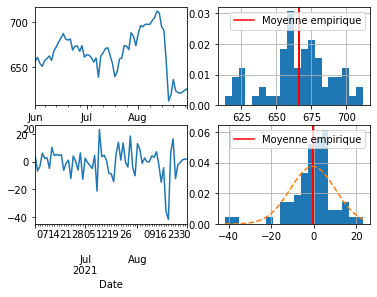

Action : Michelin



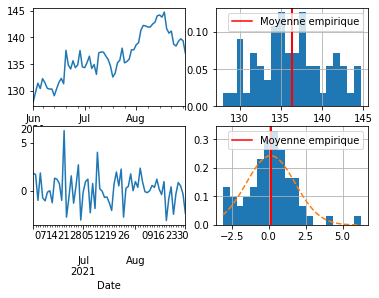

Action : Orange



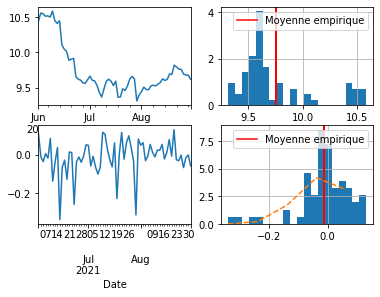

Action : Pernod Ricard



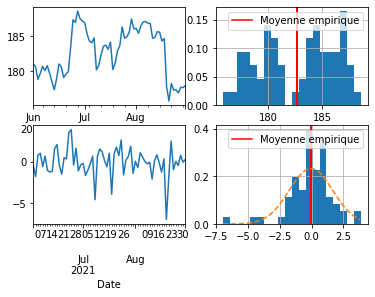

Action : Publicis Groupe



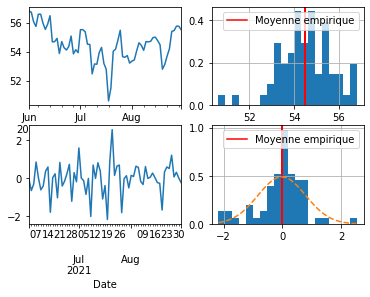

Action : Renault



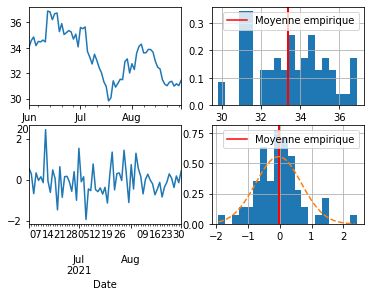

Action : Safran



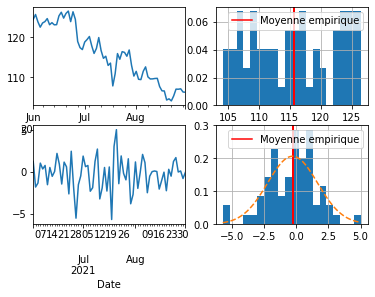

Action : Saint-Gobain



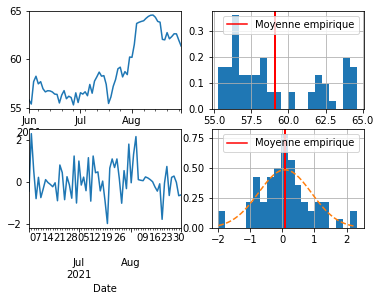

Action : Sanofi



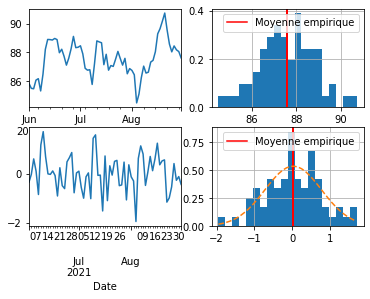

Action : Schneider Electric



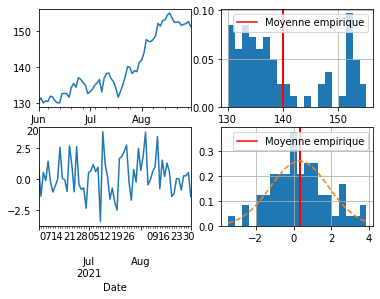

Action : Societe generale



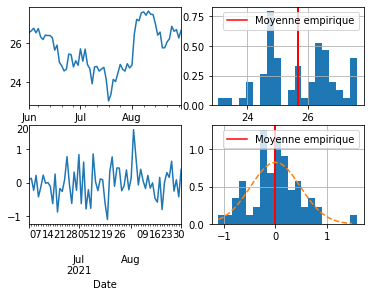

Action : STMicroelectronics



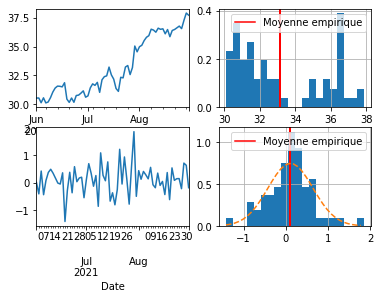

Action : Teleperformance



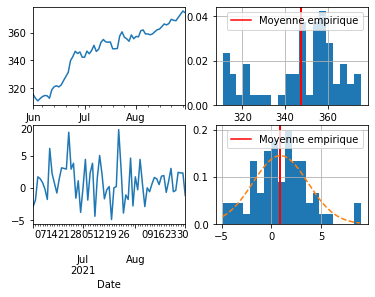

Action : Thales



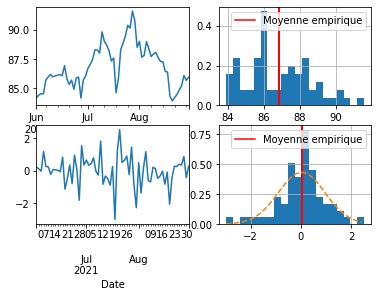

Action : TotalEnergies



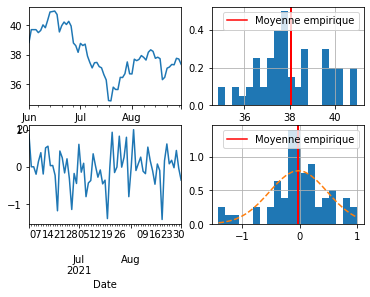

Action : Unibail-Rodamco-Westfield



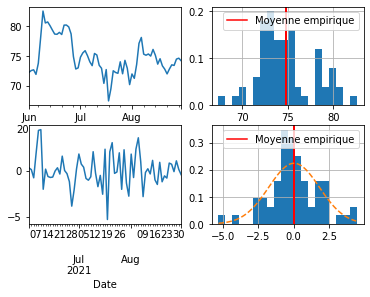

Action : Veolia



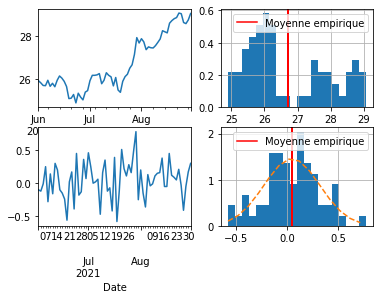

Action : Vinci



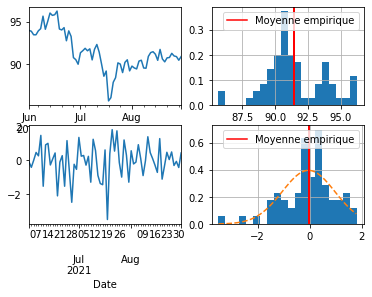

Action : Vivendi



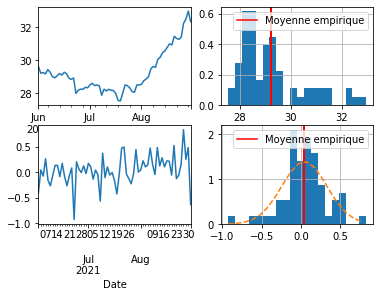

Action : Worldline



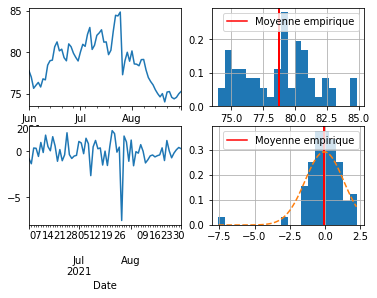

In [3]:
# Affichage des courbes des actions
list_taux = list()
for action in tickers:
    print(f"Action : {d_tickers[action]['nom']}\n")
    plt.subplot(221)
    df['Close'][action].plot()
    plt.subplot(222)
    df['Close'][action].hist(density=True,bins=20)
    xbar = df['Close'][action].mean()
    plt.axvline(xbar, color='r', linewidth=2)
    plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
    
    # Taux de croissance
    list_taux.append(df['Close'][action] - df['Close'][action].shift())
    plt.subplot(223)
    list_taux[-1].dropna().plot()
    plt.subplot(224)
    list_taux[-1].dropna().hist(density=True,bins=20)
    xbar_taux = list_taux[-1].dropna().mean()
    sprime_taux = list_taux[-1].dropna().std(ddof=1)
    plt.axvline(xbar_taux, color='r', linewidth=2)
    plt.legend(handles=[mlines.Line2D([], [], color='red',markersize=15, label="Moyenne empirique")])
    bins=np.arange(list_taux[-1].dropna().min(), list_taux[-1].dropna().max(), 0.1)
    y = norm(loc = xbar_taux, scale = sprime_taux)
    plt.plot(bins, y.pdf(bins), '--')
    plt.show()
    
df_tmp = pd.concat(list_taux, axis=1)
df_tmp.columns = pd.MultiIndex(levels = [['Taux'], df_tmp.columns], 
                               codes = [[0] * len(df_tmp.columns), range(0,len(df_tmp.columns),1)])
df = pd.concat([df, df_tmp], axis = 1)


Action : Air liquide
Moyenne Action : 147.4169692993164 / Moyenne Taux : 0.18769249549278846
Mediane Action : 148.1999969482422 / Mediane Taux : 0.160003662109375
Variance Action : 11.075516104377591 / Variance Taux : 1.7751587157959314
Sigma Action : 3.3279897993199423 / Sigma Taux : 1.3323508230927512
Coefficient de variation (Action) : 0.02257535082384423 / Coefficient de variation (Taux) : 7.098583348229513
Skew Action : -0.9441756897551711 / Skew Taux : -0.06302246170966574
Kurtosis Action : -0.03131480334473746 / Kurtosis Taux : 1.577968729037


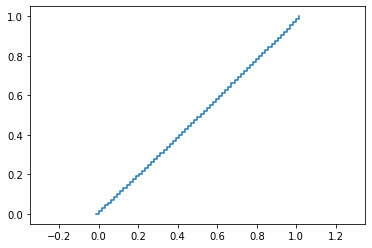

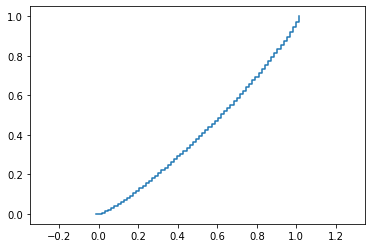

Gini Action : 0.012156135656538058 / Gini Taux : 0.16768004252927393

Action : Airbus
Moyenne Action : 112.24484865593188 / Moyenne Taux : 0.10676915095402645
Mediane Action : 112.27000045776367 / Mediane Taux : 0.1399993896484375
Variance Action : 7.756370253705526 / Variance Taux : 3.1226281588024554
Sigma Action : 2.785026077742456 / Sigma Taux : 1.767095967626675
Coefficient de variation (Action) : 0.024812061409423745 / Coefficient de variation (Taux) : 16.550623020197715
Skew Action : -0.5341609260312805 / Skew Taux : -0.7826576683286693
Kurtosis Action : 0.36413742499857626 / Kurtosis Taux : 3.698448318457525


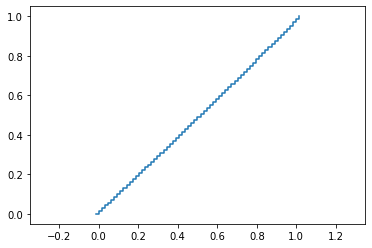

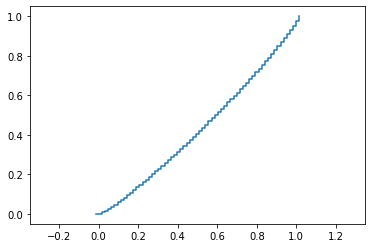

Gini Action : 0.013758375588802552 / Gini Taux : 0.12883000248486542

Action : Alstom
Moyenne Action : 39.30272715019457 / Moyenne Taux : -0.15030764066256008
Mediane Action : 36.82499885559082 / Mediane Taux : -0.0800018310546875
Variance Action : 16.814959143272368 / Variance Taux : 0.5139093360062502
Sigma Action : 4.10060472897259 / Sigma Taux : 0.7168747003530326
Coefficient de variation (Action) : 0.10433384719849625 / Coefficient de variation (Taux) : -4.769382961458445
Skew Action : 0.5351780024748509 / Skew Taux : -2.3338057595444472
Kurtosis Action : -1.4572936015032432 / Kurtosis Taux : 9.025567692618823


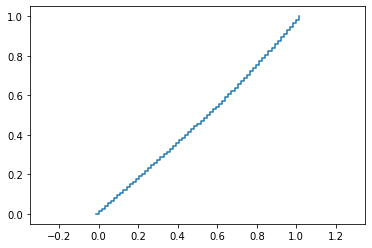

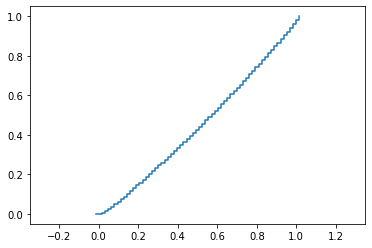

Gini Action : 0.05621197124227473 / Gini Taux : 0.09741352550579985

Action : ArcelorMittal
Moyenne Action : 27.35143944711396 / Moyenne Taux : 0.013153839111328124
Mediane Action : 27.014999389648438 / Mediane Taux : 0.06500053405761719
Variance Action : 3.44548264227949 / Variance Taux : 0.4381049870962442
Sigma Action : 1.8562011319572806 / Sigma Taux : 0.661894997032191
Coefficient de variation (Action) : 0.0678648425632729 / Coefficient de variation (Taux) : 50.319529639234005
Skew Action : 0.1393494362463276 / Skew Taux : -0.48079047037998424
Kurtosis Action : -1.0675240762672495 / Kurtosis Taux : 0.6099258213496794


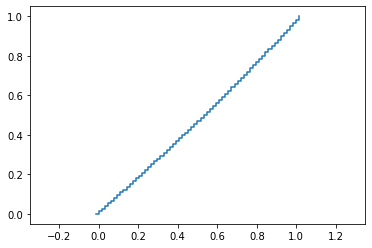

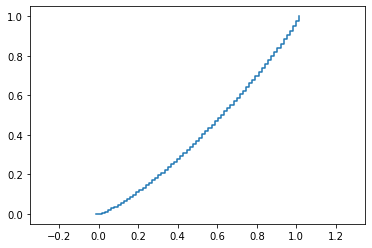

Gini Action : 0.038575324236908015 / Gini Taux : 0.17327244968351774

Action : Axa
Moyenne Action : 22.625681906035453 / Moyenne Taux : 0.015230765709510216
Mediane Action : 22.432499885559082 / Mediane Taux : 0.04500007629394531
Variance Action : 1.0555160924517193 / Variance Taux : 0.07105591756202591
Sigma Action : 1.027383128366297 / Sigma Taux : 0.26656315867356073
Coefficient de variation (Action) : 0.045407830474812796 / Coefficient de variation (Taux) : 17.50162557533903
Skew Action : 0.41262016918912303 / Skew Taux : -0.15694476901105534
Kurtosis Action : -1.2871731711632635 / Kurtosis Taux : 2.644186204384816


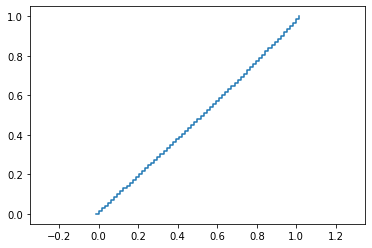

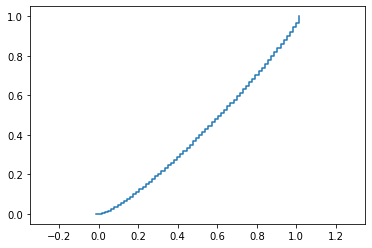

Gini Action : 0.025303156195141563 / Gini Taux : 0.16437434075694346

Action : BNP Paribas
Moyenne Action : 53.205000039302945 / Moyenne Taux : -0.045846146803635815
Mediane Action : 53.39999961853027 / Mediane Taux : 0.1100006103515625
Variance Action : 5.0564150925865485 / Variance Taux : 0.6905713298113927
Sigma Action : 2.2486473917861263 / Sigma Taux : 0.8310062152664038
Coefficient de variation (Action) : 0.042263835920026936 / Coefficient de variation (Taux) : -18.12597727843294
Skew Action : 0.05808267435357309 / Skew Taux : -0.5837287496765833
Kurtosis Action : -0.4570713030487705 / Kurtosis Taux : 0.6248325469134031


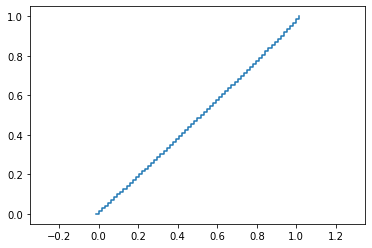

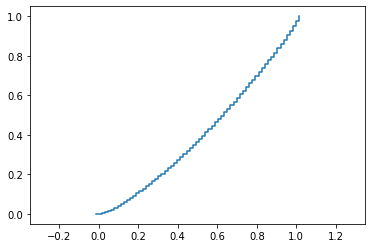

Gini Action : 0.023737989998101283 / Gini Taux : 0.18109998000051852

Action : Bouygues
Moyenne Action : 33.111060778299965 / Moyenne Taux : 0.026615377572866587
Mediane Action : 32.90999984741211 / Mediane Taux : 0.029998779296875
Variance Action : 1.9662153246065432 / Variance Taux : 0.13612266714284346
Sigma Action : 1.4022180018123227 / Sigma Taux : 0.36894805480289966
Coefficient de variation (Action) : 0.04234893020193711 / Coefficient de variation (Taux) : 13.862213819541259
Skew Action : 0.4270333892658125 / Skew Taux : -0.17042318561172565
Kurtosis Action : -0.7688120942740215 / Kurtosis Taux : 1.5282865003786688


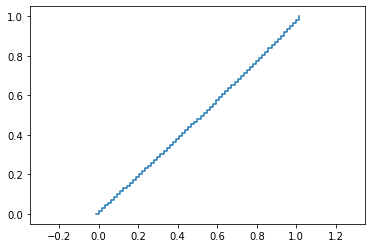

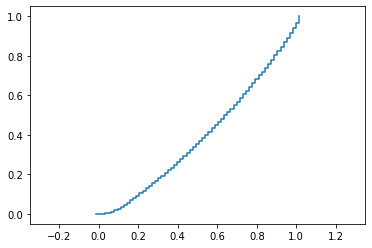

Gini Action : 0.023862630887721892 / Gini Taux : 0.2057647450775807

Action : Capgemini
Moyenne Action : 171.77954656427556 / Moyenne Taux : 0.5776921198918269
Mediane Action : 167.07500457763672 / Mediane Taux : 0.20001220703125
Variance Action : 210.8548408600261 / Variance Taux : 3.1027338855097275
Sigma Action : 14.52084160302102 / Sigma Taux : 1.7614578863855155
Coefficient de variation (Action) : 0.08453184266374629 / Coefficient de variation (Taux) : 3.0491291567476275
Skew Action : 0.1523962359599734 / Skew Taux : 0.6654139384398418
Kurtosis Action : -1.4721461371253999 / Kurtosis Taux : 1.7470081616641435


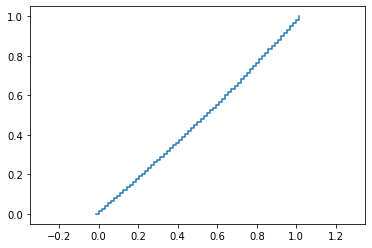

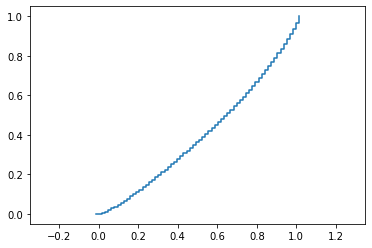

Gini Action : 0.047170499239797214 / Gini Taux : 0.19707647950235319

Action : Carrefour
Moyenne Action : 16.69022733514959 / Moyenne Taux : -0.0003846095158503606
Mediane Action : 16.8725004196167 / Mediane Taux : 0.024999618530273438
Variance Action : 0.24776886697279601 / Variance Taux : 0.04344870433634819
Sigma Action : 0.49776386668057376 / Sigma Taux : 0.20844352793106383
Coefficient de variation (Action) : 0.02982367206181092 / Coefficient de variation (Taux) : -541.961442296094
Skew Action : -0.6142602210080184 / Skew Taux : -1.062938354055728
Kurtosis Action : -0.831897228527116 / Kurtosis Taux : 3.9000771530133083


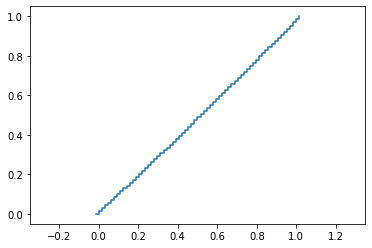

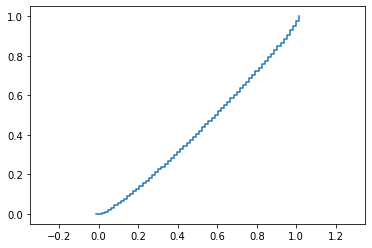

Gini Action : 0.016535786934872343 / Gini Taux : 0.1305786064656591

Action : Credit agricole
Moyenne Action : 11.962363647692131 / Moyenne Taux : -0.003753852844238281
Mediane Action : 11.948999881744385 / Mediane Taux : 0.0
Variance Action : 0.09617478148947536 / Variance Taux : 0.028114675731080754
Sigma Action : 0.31012059185013074 / Sigma Taux : 0.16767431446432324
Coefficient de variation (Action) : 0.0259246918906333 / Coefficient de variation (Taux) : -44.66725826018551
Skew Action : -0.2343112071605471 / Skew Taux : -0.2524675545362535
Kurtosis Action : -0.281320467351855 / Kurtosis Taux : 0.44353956211592127


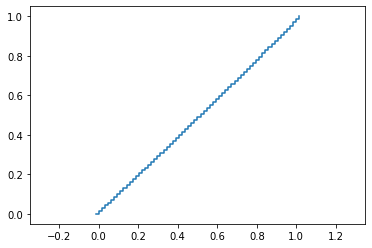

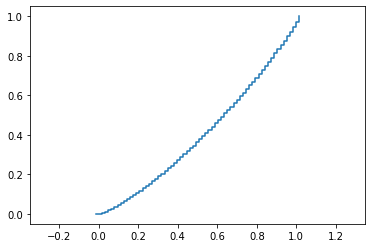

Gini Action : 0.014551686313945211 / Gini Taux : 0.18642626504556714

Action : Danone
Moyenne Action : 60.38893925059926 / Moyenne Taux : 0.05615381094125601
Mediane Action : 59.46999931335449 / Mediane Taux : 0.020000457763671875
Variance Action : 5.263197962679026 / Variance Taux : 0.5024619036847491
Sigma Action : 2.29416607129454 / Sigma Taux : 0.7088454723596315
Coefficient de variation (Action) : 0.03798983886394021 / Coefficient de variation (Taux) : 12.623283450898347
Skew Action : 0.4293025575790121 / Skew Taux : 1.9537803616215883
Kurtosis Action : -1.0786442789362711 / Kurtosis Taux : 10.041748599407674


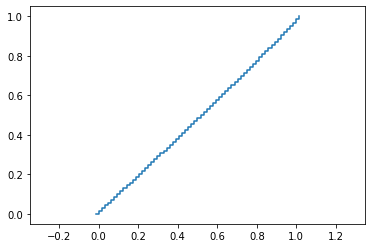

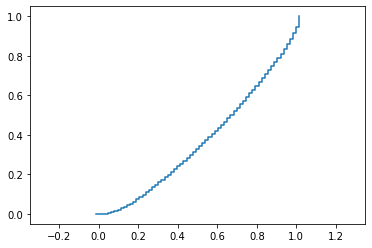

Gini Action : 0.021234672685144118 / Gini Taux : 0.25262481929162295

Action : Dassault Systemes
Moyenne Action : 43.53045457782167 / Moyenne Taux : 0.16653847327599158
Mediane Action : 43.510000228881836 / Mediane Taux : 0.10500335693359375
Variance Action : 15.239464161777084 / Variance Taux : 0.13322876086061883
Sigma Action : 3.903775629025967 / Sigma Taux : 0.3650051518275034
Coefficient de variation (Action) : 0.08967918361723017 / Coefficient de variation (Taux) : 2.191716692530308
Skew Action : -0.1376493032987954 / Skew Taux : 0.7180706033986374
Kurtosis Action : -1.3767032645728359 / Kurtosis Taux : 0.9795852462007728


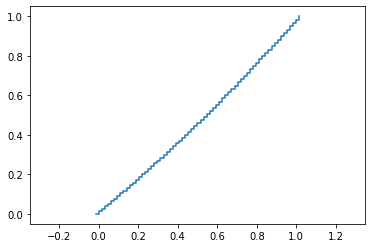

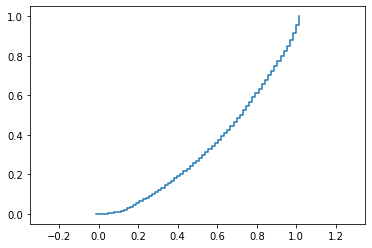

Gini Action : 0.050837505900292235 / Gini Taux : 0.3176883802615329

Action : Engie
Moyenne Action : 11.820878765799783 / Moyenne Taux : -0.0023076864389272836
Mediane Action : 11.71399974822998 / Mediane Taux : 0.004000663757324219
Variance Action : 0.12707498338766374 / Variance Taux : 0.013831041258711489
Sigma Action : 0.3564757823298292 / Sigma Taux : 0.11760544740236946
Coefficient de variation (Action) : 0.030156453626881484 / Coefficient de variation (Taux) : -50.962490145341306
Skew Action : 0.11571336059917221 / Skew Taux : -0.9026478036588461
Kurtosis Action : -1.1056220934923608 / Kurtosis Taux : 1.5182876007790505


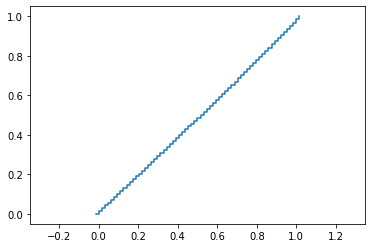

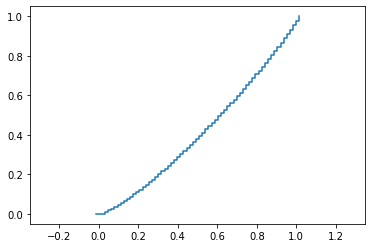

Gini Action : 0.01696951633520727 / Gini Taux : 0.16255245852651878

Action : EssilorLuxottica
Moyenne Action : 155.4445458614465 / Moyenne Taux : 0.37384596604567305
Mediane Action : 154.47000122070312 / Mediane Taux : 0.220001220703125
Variance Action : 45.89007576191124 / Variance Taux : 3.1270917344486895
Sigma Action : 6.7742214137058765 / Sigma Taux : 1.768358485841796
Coefficient de variation (Action) : 0.0435796661514518 / Coefficient de variation (Taux) : 4.730179395932693
Skew Action : 0.02418447183987334 / Skew Taux : 0.20399962145537745
Kurtosis Action : -1.036963538373913 / Kurtosis Taux : 0.6914466026128787


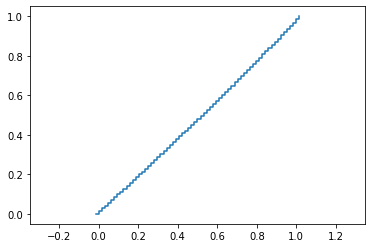

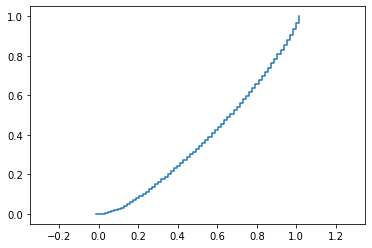

Gini Action : 0.02476297476178113 / Gini Taux : 0.23932118242468703

Action : EUROFINS SCIENTIFIC
Moyenne Action : 101.55287863991477 / Moyenne Taux : 0.5496923593374399
Mediane Action : 100.91999816894531 / Mediane Taux : 0.42000579833984375
Variance Action : 128.9588383303377 / Variance Taux : 2.995017295575067
Sigma Action : 11.356004505561703 / Sigma Taux : 1.7306118269488011
Coefficient de variation (Action) : 0.1118235608645592 / Coefficient de variation (Taux) : 3.1483279648179168
Skew Action : 0.12672284163799327 / Skew Taux : 2.7549630611444536
Kurtosis Action : -0.9962168182447435 / Kurtosis Taux : 16.361227811640575


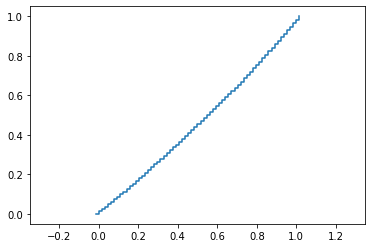

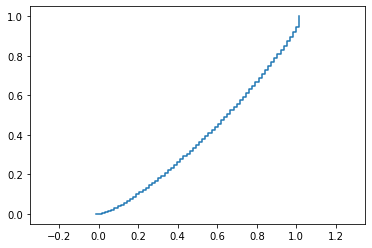

Gini Action : 0.0629062730703962 / Gini Taux : 0.21457996015950653

Action : Hermes International
Moyenne Action : 1248.280303030303 / Moyenne Taux : 1.4538461538461538
Mediane Action : 1239.0 / Mediane Taux : 3.5
Variance Action : 2679.354836829836 / Variance Taux : 266.4900240384615
Sigma Action : 51.76248484017973 / Sigma Taux : 16.324522168763824
Coefficient de variation (Action) : 0.041467036461700184 / Coefficient de variation (Taux) : 11.228507311848134
Skew Action : 0.25774744152704476 / Skew Taux : -1.2002617165733724
Kurtosis Action : -0.5993404614846258 / Kurtosis Taux : 3.513745022183384


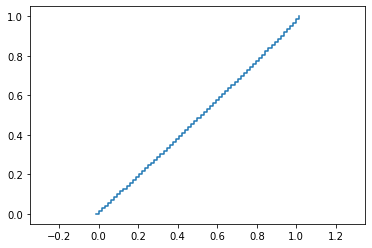

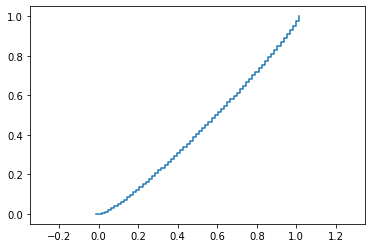

Gini Action : 0.02324235233449723 / Gini Taux : 0.1363220582146606

Action : Kering
Moyenne Action : 737.7606090198864 / Moyenne Taux : -1.0461538461538462
Mediane Action : 742.4500122070312 / Mediane Taux : 2.29998779296875
Variance Action : 1143.2090871521955 / Variance Taux : 197.44245510733364
Sigma Action : 33.811375114777505 / Sigma Taux : 14.051421817998834
Coefficient de variation (Action) : 0.04582973758885806 / Coefficient de variation (Taux) : -13.431506149557709
Skew Action : -0.9292984574107899 / Skew Taux : -1.971799168809391
Kurtosis Action : 0.6838859851265564 / Kurtosis Taux : 7.562449689956759


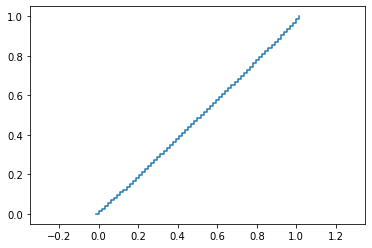

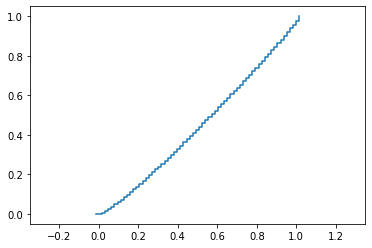

Gini Action : 0.024059171827467862 / Gini Taux : 0.10212807547452762

Action : L-Oreal
Moyenne Action : 385.4287876938329 / Moyenne Taux : 0.4046151968149038
Mediane Action : 385.5249938964844 / Mediane Taux : 0.79998779296875
Variance Action : 93.76408503271189 / Variance Taux : 12.463339077453398
Sigma Action : 9.683185686162993 / Sigma Taux : 3.530345461488634
Coefficient de variation (Action) : 0.02512315113798629 / Coefficient de variation (Taux) : 8.725192452679018
Skew Action : -0.005940184130108701 / Skew Taux : -0.5282388857604816
Kurtosis Action : -1.0283345824476817 / Kurtosis Taux : 1.7012522428961079


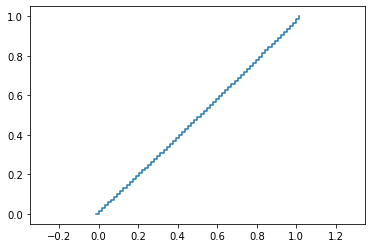

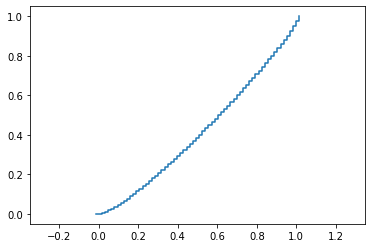

Gini Action : 0.014340104738175485 / Gini Taux : 0.1579975602319298

Action : Legrand
Moyenne Action : 92.30969631310666 / Moyenne Taux : 0.17415384145883414
Mediane Action : 92.2400016784668 / Mediane Taux : 0.15999603271484375
Variance Action : 12.804037877926678 / Variance Taux : 0.5201706263213475
Sigma Action : 3.5782730300979937 / Sigma Taux : 0.7212285534567717
Coefficient de variation (Action) : 0.038763782928727175 / Coefficient de variation (Taux) : 4.141330144745921
Skew Action : 0.019257143662755494 / Skew Taux : -0.1950145154735852
Kurtosis Action : -1.320536302918906 / Kurtosis Taux : 0.0805983188611692


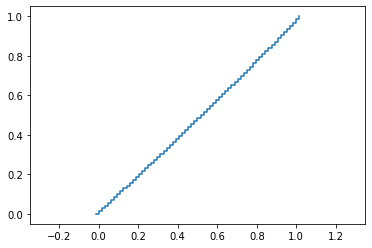

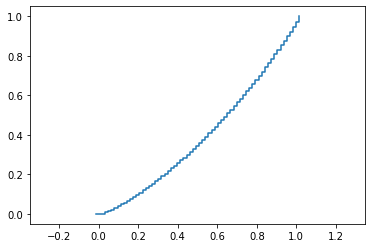

Gini Action : 0.022065596665229226 / Gini Taux : 0.20628608889049982

Action : LVMH
Moyenne Action : 666.0651504054214 / Moyenne Taux : -0.46615365835336536
Mediane Action : 666.7999877929688 / Mediane Taux : 1.10003662109375
Variance Action : 549.1708094898394 / Variance Taux : 112.40545475891291
Sigma Action : 23.43439372993975 / Sigma Taux : 10.602143875599543
Coefficient de variation (Action) : 0.035183335617657935 / Coefficient de variation (Taux) : -22.743882163341606
Skew Action : -0.32929121075620965 / Skew Taux : -1.3248639706639875
Kurtosis Action : -0.2276987916606581 / Kurtosis Taux : 4.297106175607989


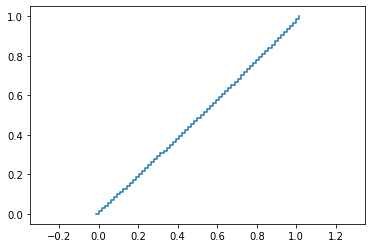

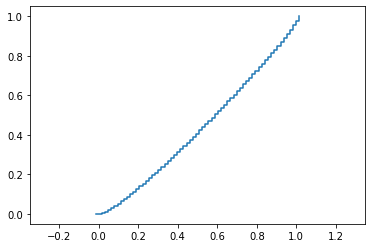

Gini Action : 0.019544117782077763 / Gini Taux : 0.12962415299908858

Action : Michelin
Moyenne Action : 136.40530372388434 / Moyenne Taux : 0.14000009390024037
Mediane Action : 135.92499542236328 / Mediane Taux : 0.1999969482421875
Variance Action : 17.81769418792006 / Variance Taux : 2.715481897382639
Sigma Action : 4.221101063457266 / Sigma Taux : 1.6478719299091902
Coefficient de variation (Action) : 0.030945285470730256 / Coefficient de variation (Taux) : 11.770505890398985
Skew Action : 0.12046925791919212 / Skew Taux : 0.5758176871287082
Kurtosis Action : -0.7680744354335372 / Kurtosis Taux : 2.172057319868525


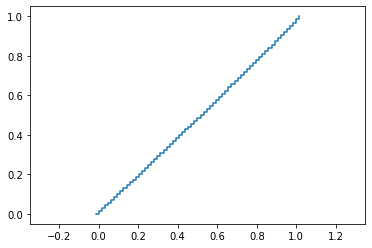

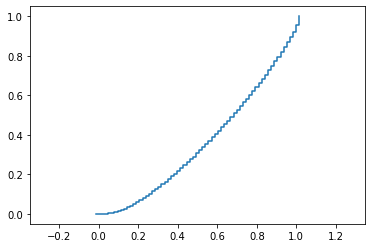

Gini Action : 0.017565924150573897 / Gini Taux : 0.27256852179701974

Action : Orange
Moyenne Action : 9.75145452672785 / Moyenne Taux : -0.012738462594839243
Mediane Action : 9.619999885559082 / Mediane Taux : -0.006999969482421875
Variance Action : 0.1257035931831429 / Variance Taux : 0.008396860068786248
Sigma Action : 0.35454702534803884 / Sigma Taux : 0.09163438256891486
Coefficient de variation (Action) : 0.03635837344841815 / Coefficient de variation (Taux) : -7.193519774202491
Skew Action : 1.328966901671055 / Skew Taux : -1.5480482461524283
Kurtosis Action : 0.5488653339207739 / Kurtosis Taux : 3.638189056310444


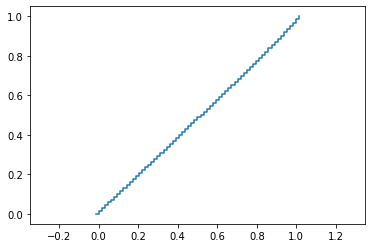

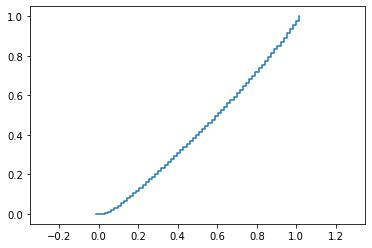

Gini Action : 0.0182743573878259 / Gini Taux : 0.14186456644658885

Action : Pernod Ricard
Moyenne Action : 182.69166703657672 / Moyenne Taux : -0.047692401592548075
Mediane Action : 183.5500030517578 / Mediane Taux : 0.04998779296875
Variance Action : 12.227122355164582 / Variance Taux : 2.9455011502502693
Sigma Action : 3.4967302376884297 / Sigma Taux : 1.716246238233392
Coefficient de variation (Action) : 0.01914006420987088 / Coefficient de variation (Taux) : -35.9857373695678
Skew Action : -0.18546968633396665 / Skew Taux : -1.0867209510345763
Kurtosis Action : -1.2694508125796733 / Kurtosis Taux : 4.08215291787352


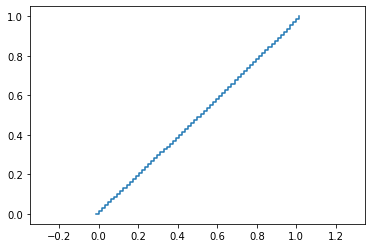

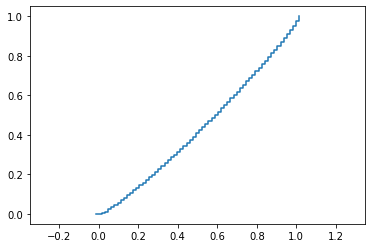

Gini Action : 0.0108813731301588 / Gini Taux : 0.12694770859384663

Action : Publicis Groupe
Moyenne Action : 54.506060629179984 / Moyenne Taux : -0.019692288912259614
Mediane Action : 54.510000228881836 / Mediane Taux : 0.020000457763671875
Variance Action : 1.439594096877156 / Variance Taux : 0.6656563790941128
Sigma Action : 1.1998308617789242 / Sigma Taux : 0.815877674099563
Coefficient de variation (Action) : 0.02201279725463394 / Coefficient de variation (Taux) : -41.431327649861515
Skew Action : -0.4650760976055738 / Skew Taux : -0.3446036330957019
Kurtosis Action : 0.9108620765737045 / Kurtosis Taux : 1.7750148721266878


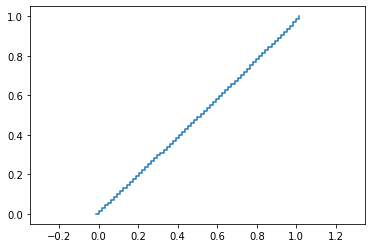

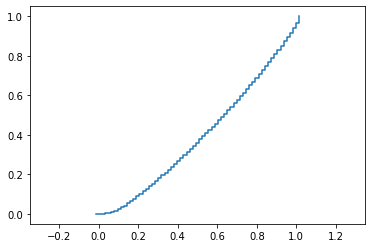

Gini Action : 0.012088868019744403 / Gini Taux : 0.1981790982732078

Action : Renault
Moyenne Action : 33.39159086978797 / Moyenne Taux : -0.03953845684344952
Mediane Action : 33.59499931335449 / Mediane Taux : -0.04000091552734375
Variance Action : 3.3310576470252977 / Variance Taux : 0.5159756090089418
Sigma Action : 1.8251185295824757 / Sigma Taux : 0.7183144221084119
Coefficient de variation (Action) : 0.05465802862462015 / Coefficient de variation (Taux) : -18.167487541371198
Skew Action : 0.06559088848649154 / Skew Taux : 0.5571045765900169
Kurtosis Action : -0.9375285271888871 / Kurtosis Taux : 1.9351390618731195


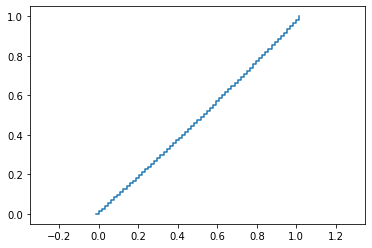

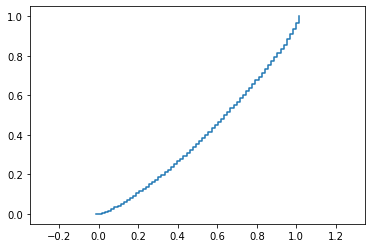

Gini Action : 0.03109664943505852 / Gini Taux : 0.20193968914097649

Action : Safran
Moyenne Action : 115.67212122136897 / Moyenne Taux : -0.27969231238731973
Mediane Action : 115.93999862670898 / Mediane Taux : -0.0200042724609375
Variance Action : 48.33192712628703 / Variance Taux : 3.7425954112869824
Sigma Action : 6.952116737101516 / Sigma Taux : 1.9345788718186143
Coefficient de variation (Action) : 0.060101921393806 / Coefficient de variation (Taux) : -6.916811031758345
Skew Action : 0.024034666191525902 / Skew Taux : -0.32880605387787365
Kurtosis Action : -1.3053375901922915 / Kurtosis Taux : 0.8919369139229669


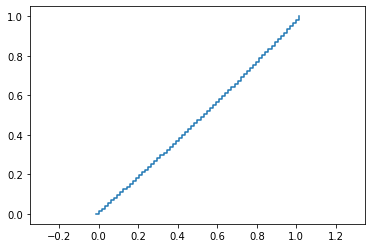

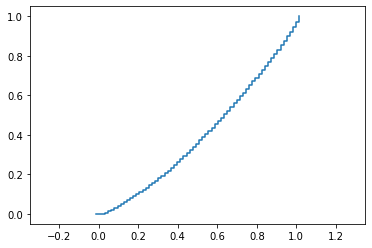

Gini Action : 0.03429201437899243 / Gini Taux : 0.19529262010516935

Action : Saint-Gobain
Moyenne Action : 59.081363793575406 / Moyenne Taux : 0.08584612332857572
Mediane Action : 58.05499839782715 / Mediane Taux : 0.049999237060546875
Variance Action : 9.456900407878505 / Variance Taux : 0.6711306909057524
Sigma Action : 3.0752073764022003 / Sigma Taux : 0.8192256654339831
Coefficient de variation (Action) : 0.05205037898493133 / Coefficient de variation (Taux) : 9.542954692297519
Skew Action : 0.5968791450797848 / Skew Taux : 0.3241040109949563
Kurtosis Action : -1.1788080238583598 / Kurtosis Taux : 0.8149130911432723


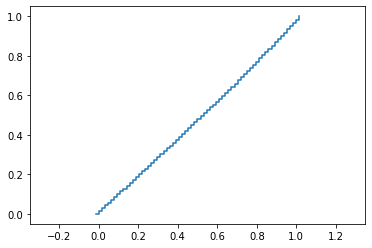

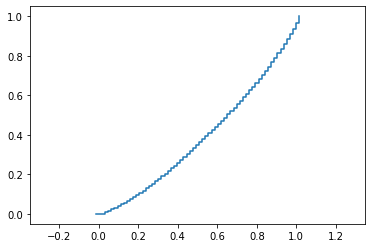

Gini Action : 0.028629292673322038 / Gini Taux : 0.21581312711405398

Action : Sanofi
Moyenne Action : 87.57697007150361 / Moyenne Taux : 0.02707695594200721
Mediane Action : 87.59499740600586 / Mediane Taux : 0.029998779296875
Variance Action : 1.563738690525804 / Variance Taux : 0.5574521860052651
Sigma Action : 1.2504953780505563 / Sigma Taux : 0.7466272068477449
Coefficient de variation (Action) : 0.014278815275632047 / Coefficient de variation (Taux) : 27.574266784156
Skew Action : -0.052104072593017955 / Skew Taux : -0.11447597174028129
Kurtosis Action : -0.0668270853691122 / Kurtosis Taux : 0.029116410384961267


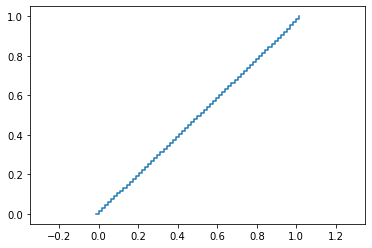

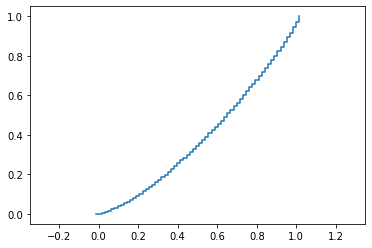

Gini Action : 0.007999156560952625 / Gini Taux : 0.2105221267507127

Action : Schneider Electric
Moyenne Action : 139.97030292857778 / Moyenne Taux : 0.32092308631310096
Mediane Action : 136.9000015258789 / Mediane Taux : 0.1999969482421875
Variance Action : 68.51018297907105 / Variance Taux : 2.334890239919276
Sigma Action : 8.27708783202589 / Sigma Taux : 1.528034763976028
Coefficient de variation (Action) : 0.059134599688974124 / Coefficient de variation (Taux) : 4.76137376569175
Skew Action : 0.5892290265646375 / Skew Taux : 0.20577019391362267
Kurtosis Action : -1.2046684717222635 / Kurtosis Taux : 0.05349496283428845


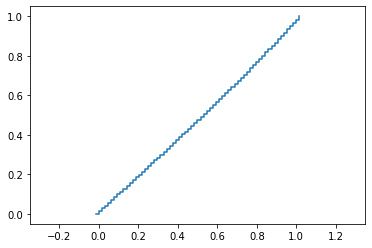

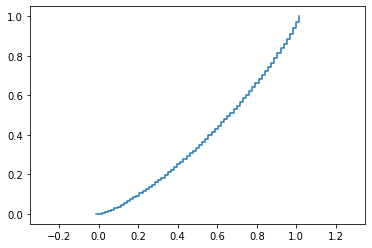

Gini Action : 0.03250190939490771 / Gini Taux : 0.22492527349292424

Action : Societe generale
Moyenne Action : 25.684924183469832 / Moyenne Taux : 0.0018461374136117788
Mediane Action : 25.725000381469727 / Mediane Taux : 0.0
Variance Action : 1.257508000086507 / Variance Taux : 0.23325035918159337
Sigma Action : 1.121386641656885 / Sigma Taux : 0.4829599974962661
Coefficient de variation (Action) : 0.043659332363479623 / Coefficient de variation (Taux) : 261.6056605187391
Skew Action : -0.09630453507174573 / Skew Taux : 0.346583018279283
Kurtosis Action : -0.8414266688482113 / Kurtosis Taux : 0.951848010533717


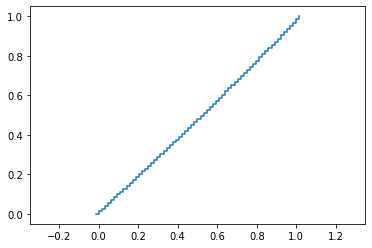

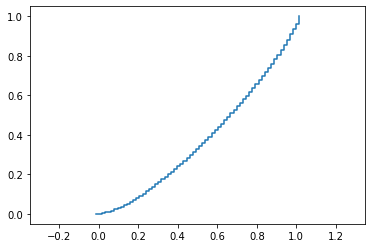

Gini Action : 0.024650053890355572 / Gini Taux : 0.23870163056134053

Action : STMicroelectronics
Moyenne Action : 33.1756818077781 / Moyenne Taux : 0.1105384533221905
Mediane Action : 32.30500030517578 / Mediane Taux : 0.12999725341796875
Variance Action : 6.252355489701853 / Variance Taux : 0.28491056921364954
Sigma Action : 2.500471053562079 / Sigma Taux : 0.5337701464241416
Coefficient de variation (Action) : 0.07537060031049125 / Coefficient de variation (Taux) : 4.828818663387138
Skew Action : 0.4327567193269536 / Skew Taux : 0.1543899812426181
Kurtosis Action : -1.4065639507315895 / Kurtosis Taux : 1.5775035142311111


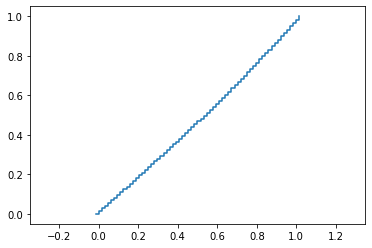

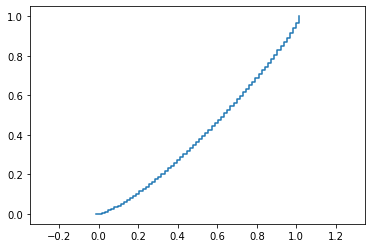

Gini Action : 0.041813147618223856 / Gini Taux : 0.18833772823103945

Action : Teleperformance
Moyenne Action : 347.2893935694839 / Moyenne Taux : 0.9046151968149039
Mediane Action : 353.0500030517578 / Mediane Taux : 0.800018310546875
Variance Action : 340.6625243697385 / Variance Taux : 7.601077248050401
Sigma Action : 18.457045385698613 / Sigma Taux : 2.7570051229641197
Coefficient de variation (Action) : 0.05314600943033356 / Coefficient de variation (Taux) : 3.0477103774857754
Skew Action : -0.6680546209172719 / Skew Taux : 0.43950934255986657
Kurtosis Action : -0.6713581699901745 / Kurtosis Taux : 0.8698033313567315


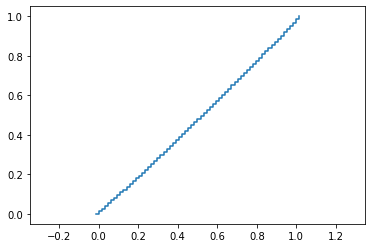

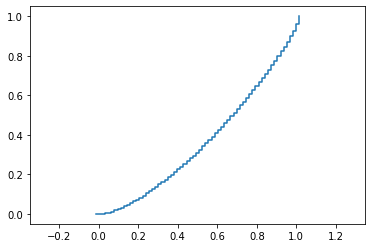

Gini Action : 0.02922165456220549 / Gini Taux : 0.26014844653574787

Action : Thales
Moyenne Action : 86.8448486328125 / Moyenne Taux : 0.02707695594200721
Mediane Action : 86.4000015258789 / Mediane Taux : 0.1199951171875
Variance Action : 3.279913777069977 / Variance Taux : 0.8620930699270855
Sigma Action : 1.8110532231466796 / Sigma Taux : 0.9284896714164813
Coefficient de variation (Action) : 0.020853893485426735 / Coefficient de variation (Taux) : 34.290770107433744
Skew Action : 0.42698237748601886 / Skew Taux : -0.5275454663273149
Kurtosis Action : -0.38536483158473134 / Kurtosis Taux : 1.8047446687548607


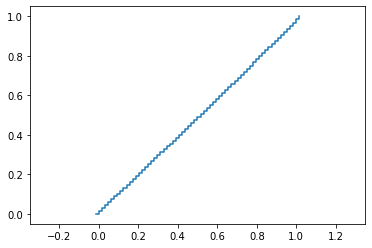

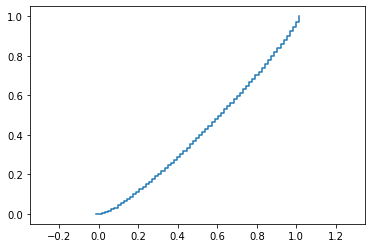

Gini Action : 0.011703632820457166 / Gini Taux : 0.16372560962050742

Action : TotalEnergies
Moyenne Action : 38.07522727503921 / Moyenne Taux : -0.022692284217247595
Mediane Action : 37.75 / Mediane Taux : -0.009998321533203125
Variance Action : 2.287756847741443 / Variance Taux : 0.25350629103487826
Sigma Action : 1.5125332550861297 / Sigma Taux : 0.5034940824229003
Coefficient de variation (Action) : 0.03972486478308414 / Coefficient de variation (Taux) : -22.187897771887258
Skew Action : 0.12990381827036698 / Skew Taux : -0.5757487736310042
Kurtosis Action : -0.627325328086934 / Kurtosis Taux : 1.133406860199174


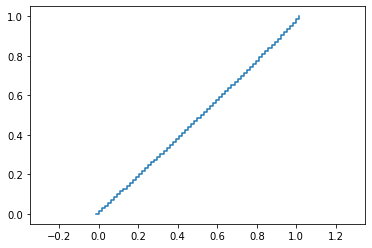

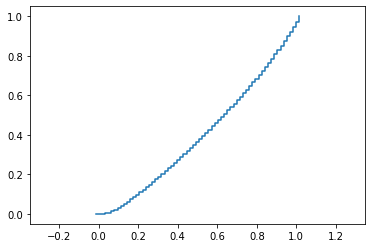

Gini Action : 0.022324439324413303 / Gini Taux : 0.1926835386507736

Action : Unibail-Rodamco-Westfield
Moyenne Action : 74.82802997935902 / Moyenne Taux : 0.030153832068810095
Mediane Action : 74.2349967956543 / Mediane Taux : -0.1399993896484375
Variance Action : 9.547975848604747 / Variance Taux : 3.167616984281463
Sigma Action : 3.089979910712163 / Sigma Taux : 1.779780038173668
Coefficient de variation (Action) : 0.041294417500561224 / Coefficient de variation (Taux) : 59.023345162640226
Skew Action : 0.47770045138709105 / Skew Taux : 0.01930069951522006
Kurtosis Action : -0.09313743509761485 / Kurtosis Taux : 1.0009611206049653


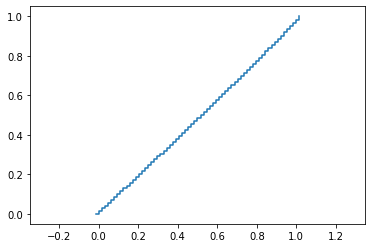

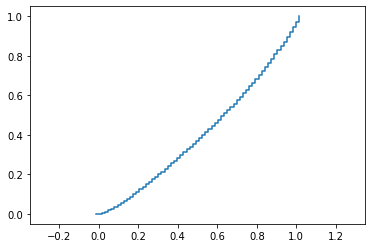

Gini Action : 0.02261036729529542 / Gini Taux : 0.18126623248436735

Action : Veolia
Moyenne Action : 26.696515198909875 / Moyenne Taux : 0.04799998356745793
Mediane Action : 26.18000030517578 / Mediane Taux : 0.05999946594238281
Variance Action : 1.5681612739054172 / Variance Taux : 0.07521624166087035
Sigma Action : 1.2522624620683227 / Sigma Taux : 0.27425579603878997
Coefficient de variation (Action) : 0.04690733800790065 / Coefficient de variation (Taux) : 5.713664373517086
Skew Action : 0.5574643157723637 / Skew Taux : -0.0948157006367821
Kurtosis Action : -1.0832517846852032 / Kurtosis Taux : 0.09892354826982519


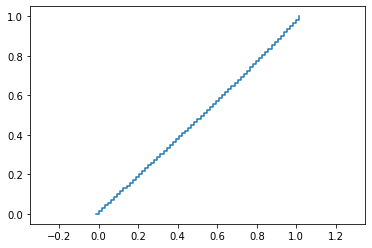

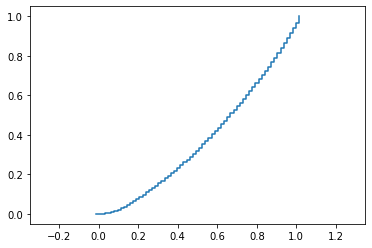

Gini Action : 0.0259381654055445 / Gini Taux : 0.24317642511278414

Action : Vinci
Moyenne Action : 91.46409086747603 / Moyenne Taux : -0.04723076453575721
Mediane Action : 90.93500137329102 / Mediane Taux : 0.04000091552734375
Variance Action : 5.13179945491032 / Variance Taux : 1.0165627613925048
Sigma Action : 2.265347535127959 / Sigma Taux : 1.0082473711309665
Coefficient de variation (Action) : 0.024767616598411958 / Coefficient de variation (Taux) : -21.347259165530723
Skew Action : 0.1530015827640053 / Skew Taux : -0.7929428722220385
Kurtosis Action : 0.07566632621917346 / Kurtosis Taux : 1.3863187320141899


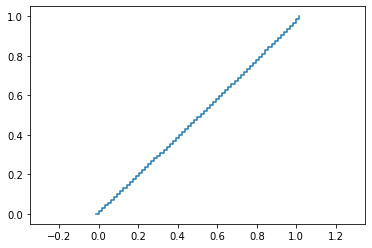

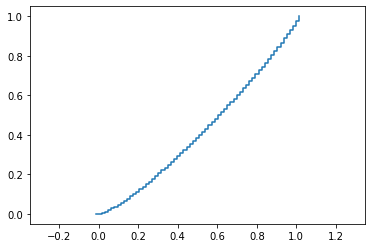

Gini Action : 0.013590538863319068 / Gini Taux : 0.15751531348311798

Action : Vivendi
Moyenne Action : 29.23848484501694 / Moyenne Taux : 0.041692293607271634
Mediane Action : 28.914999961853027 / Mediane Taux : 0.04000091552734375
Variance Action : 1.6349420190332447 / Variance Taux : 0.0822674722258818
Sigma Action : 1.2786485127012992 / Sigma Taux : 0.2868230678064123
Coefficient de variation (Action) : 0.043731695382950624 / Coefficient de variation (Taux) : 6.879522400667037
Skew Action : 1.2320566448940506 / Skew Taux : -0.4172310952789728
Kurtosis Action : 0.8078681262711016 / Kurtosis Taux : 2.0189483397225896


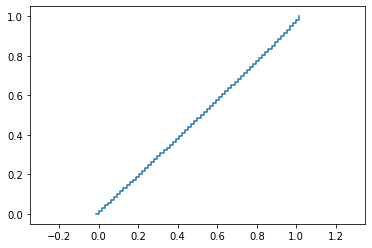

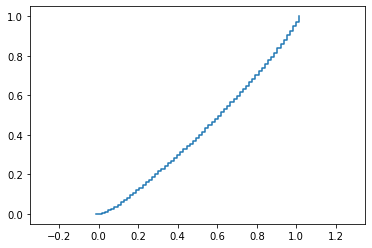

Gini Action : 0.022895374287231096 / Gini Taux : 0.15603355509069217

Action : Worldline
Moyenne Action : 78.7436365069765 / Moyenne Taux : -0.038461538461538464
Mediane Action : 78.96500015258789 / Mediane Taux : 0.029998779296875
Variance Action : 7.580491932856404 / Variance Taux : 1.8684894790599524
Sigma Action : 2.753269317167575 / Sigma Taux : 1.3669270203854895
Coefficient de variation (Action) : 0.03496497544818929 / Coefficient de variation (Taux) : -35.54010253002273
Skew Action : 0.10573510115021391 / Skew Taux : -2.545097398039338
Kurtosis Action : -0.7282273500458616 / Kurtosis Taux : 13.475708874900343


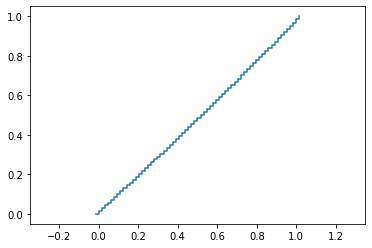

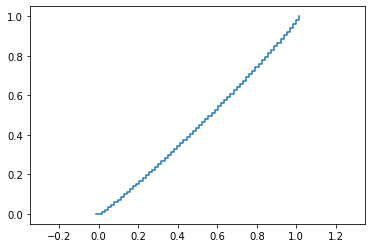

Gini Action : 0.01978010156761567 / Gini Taux : 0.08694617266366067


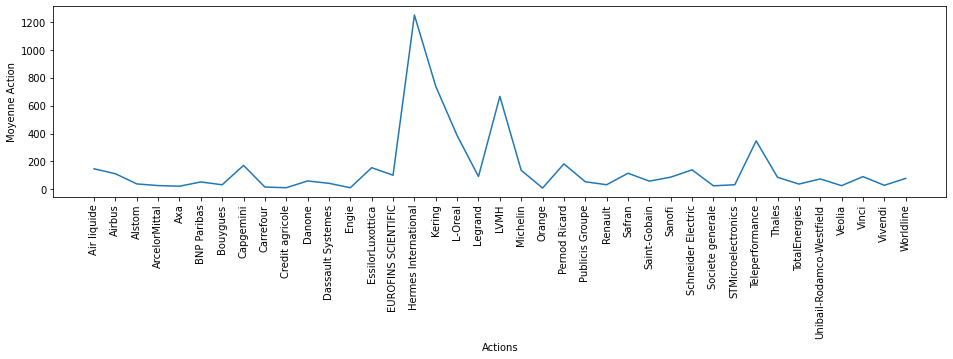

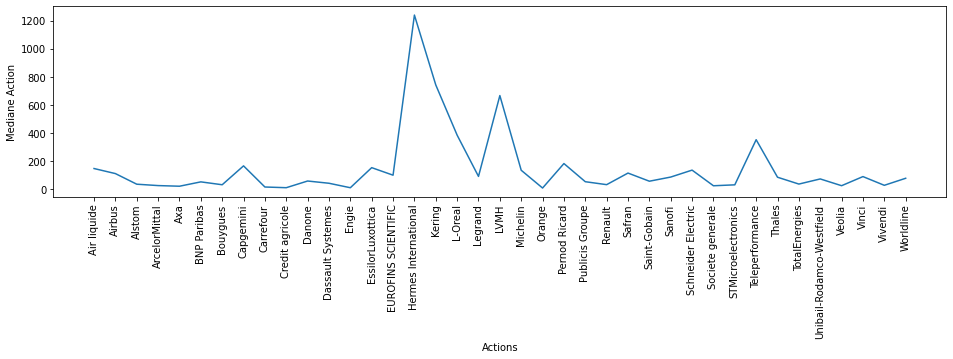

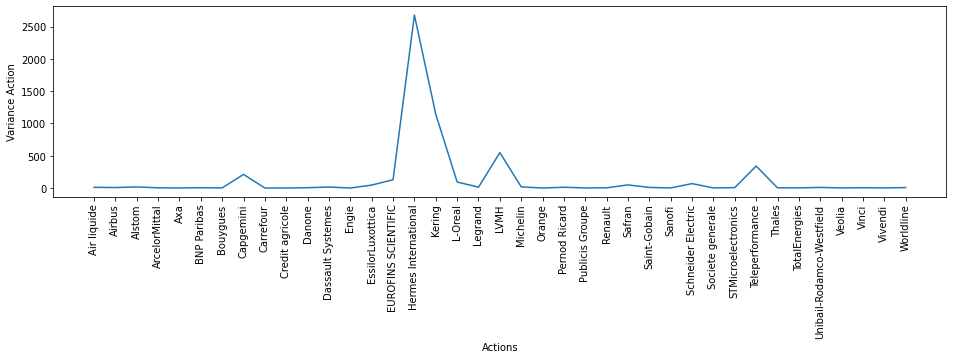

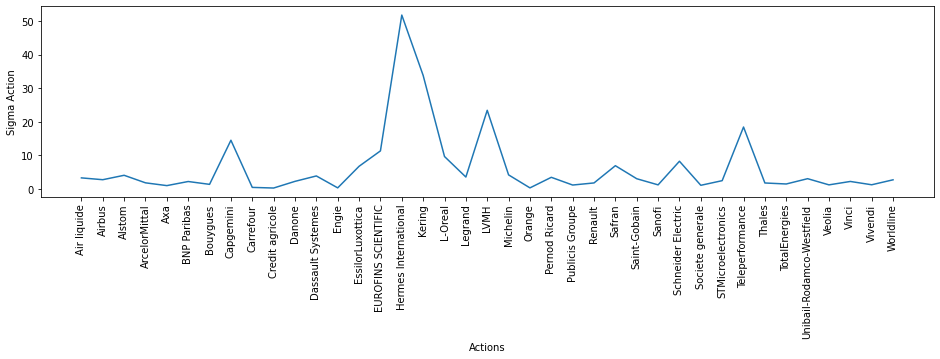

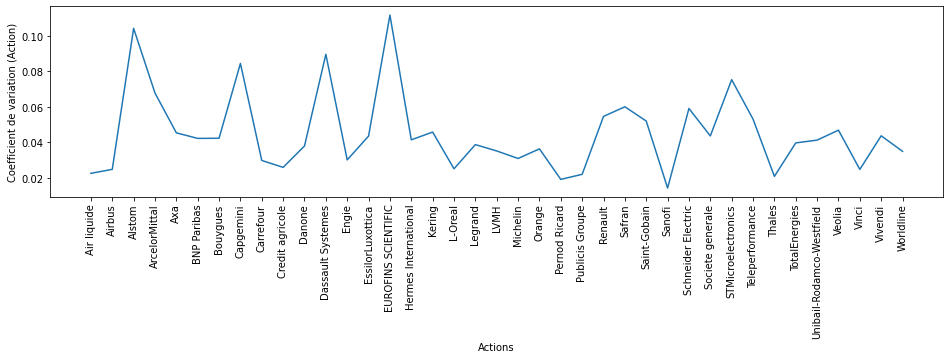

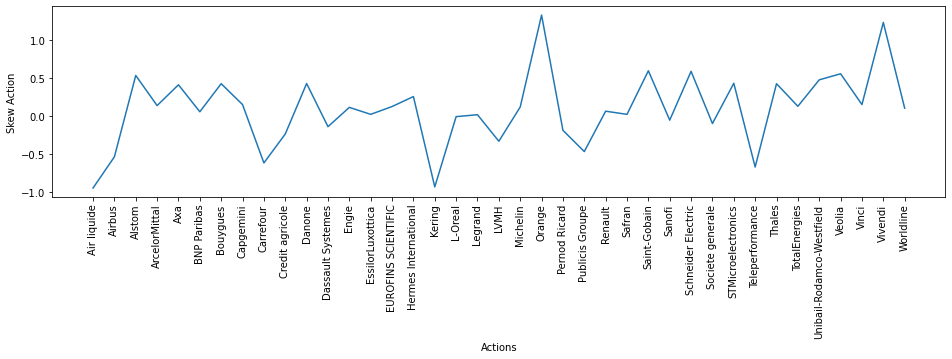

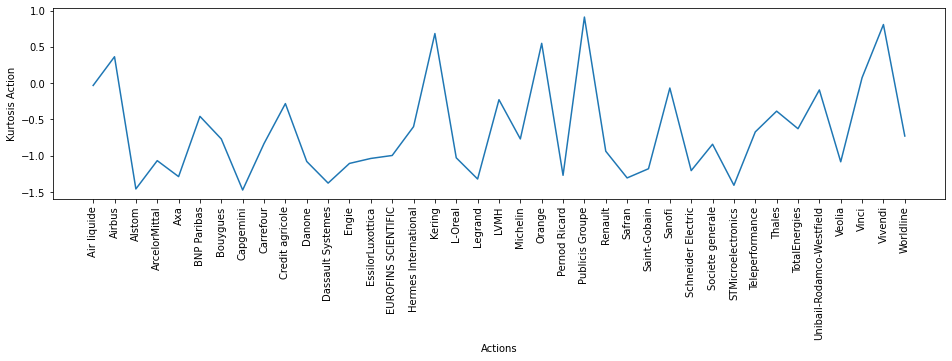

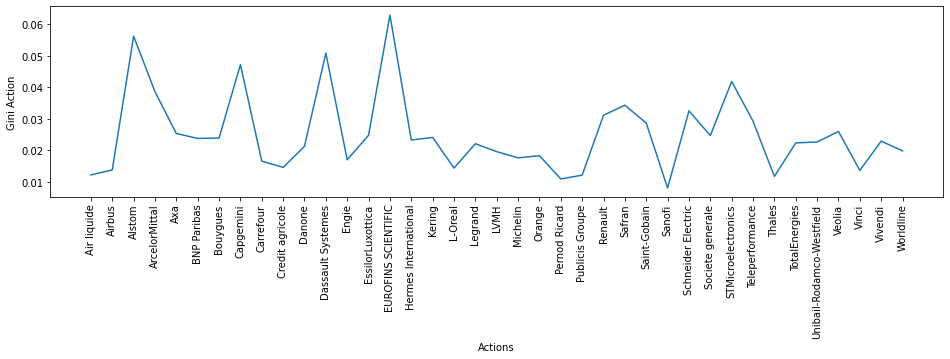

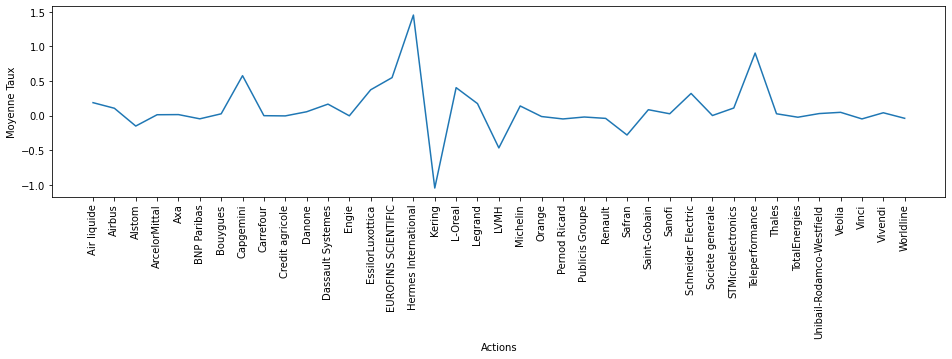

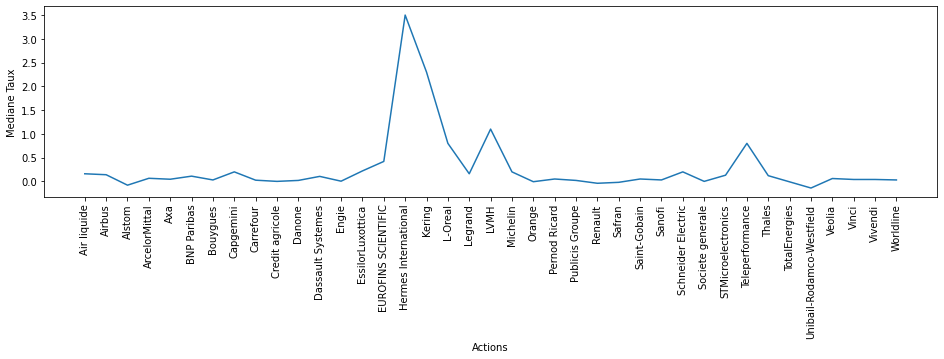

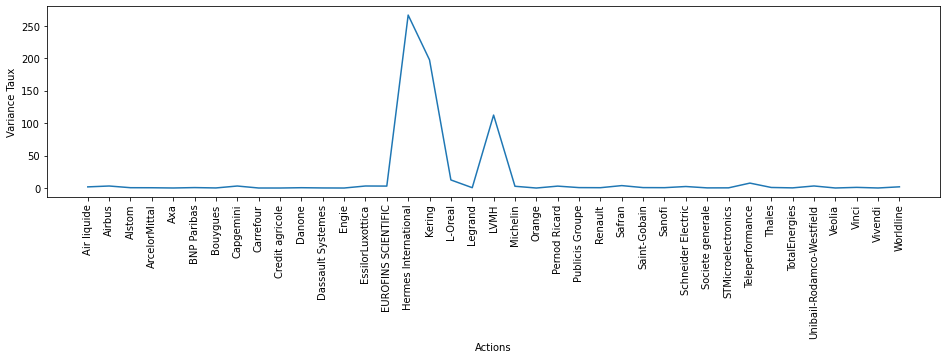

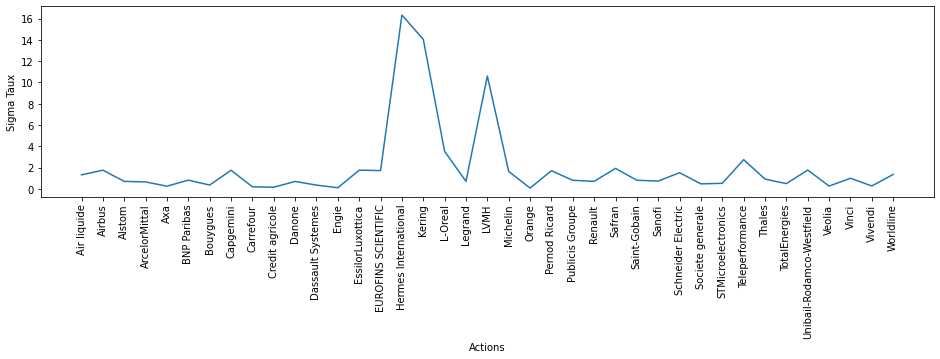

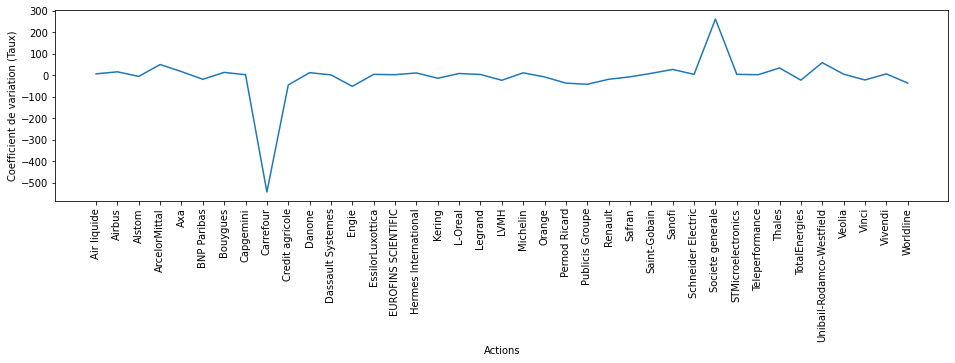

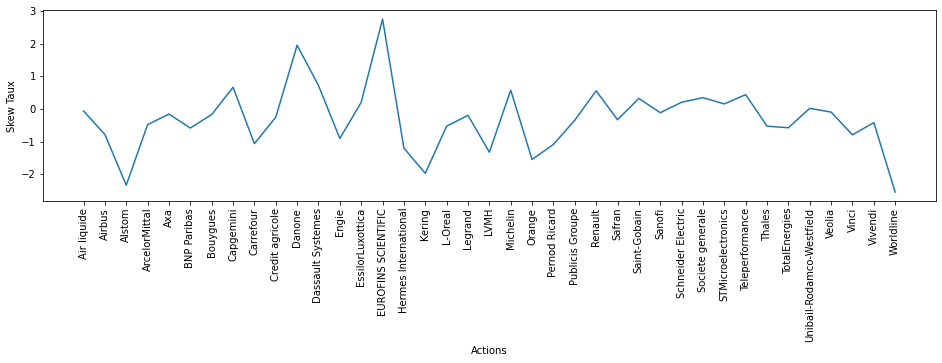

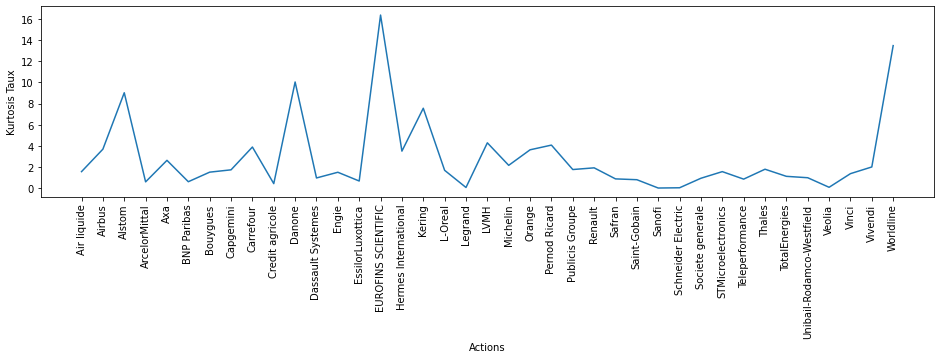

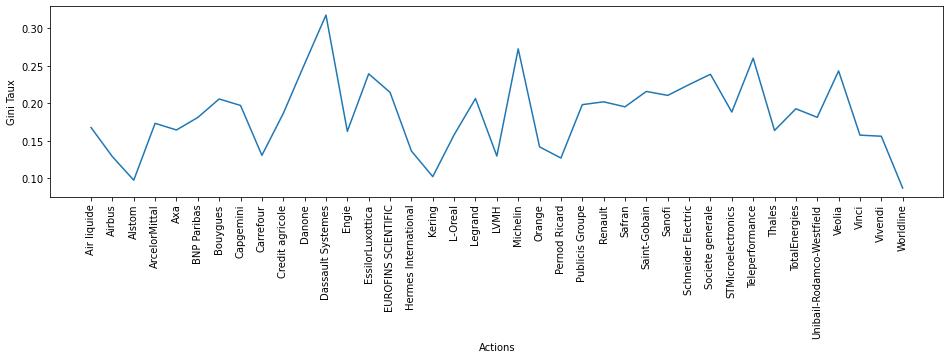

In [4]:
# Calcul des caractéristiques de l'action
l_index = list()
d_columns = {
    "Moyenne Action" : [],
    "Mediane Action" : [],
    "Variance Action" : [],
    "Sigma Action" : [],
    "Coefficient de variation (Action)" : [],
    "Skew Action" : [],
    "Kurtosis Action" : [],
    "Gini Action" : [],    
    "Moyenne Taux" : [],
    "Mediane Taux" : [],
    "Variance Taux" : [],
    "Sigma Taux" : [],
    "Coefficient de variation (Taux)" : [],
    "Skew Taux" : [],
    "Kurtosis Taux" : [],
    "Gini Taux" : [],
}

for action in tickers:
    print(f"\nAction : {d_tickers[action]['nom']}")
    Amoy = df['Close'][action].mean()
    Amedian = df['Close'][action].median()
    Amod = df['Close'][action].mode()
    Avar = df['Close'][action].var()
    Asig = df['Close'][action].std()
    
    # Calcul des caractéristiques du taux
    taux = df['Taux'].dropna()
    Tmoy = taux[action].mean()
    Tmedian = taux[action].median()
    Tmod = taux[action].mode()
    Tvar = taux[action].var()
    Tsig = taux[action].std()

    print(f"Moyenne Action : {Amoy} / Moyenne Taux : {Tmoy}")
    print(f"Mediane Action : {Amedian} / Mediane Taux : {Tmedian}")
    #print(f"Mode : {mod}")
    print(f"Variance Action : {Avar} / Variance Taux : {Tvar}")
    print(f"Sigma Action : {Asig} / Sigma Taux : {Tsig}")

    # Coefficient de variation
    Acv = Asig / Amoy
    Tcv = Tsig / Tmoy
    print(f"Coefficient de variation (Action) : {Acv} / Coefficient de variation (Taux) : {Tcv}")

    # Fonction de forme
        # Dominante droite ou gauche
    Askew = df['Close'][action].skew()
    Tskew = taux[action].skew()
    print(f"Skew Action : {Askew} / Skew Taux : {Tskew}")
        # Applatissement si <0 applatit ; =0 loi normale ; >0 pic
    Akurtosis = df['Close'][action].kurtosis()
    Tkurtosis = taux[action].kurtosis()
    print(f"Kurtosis Action : {Akurtosis} / Kurtosis Taux : {Tkurtosis}")

    # Lorenz
    action_values = df['Close'][action].values
    n = len(action_values)
    lorenz = np.cumsum(np.sort(action_values)) / action_values.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

    plt.axes().axis('equal')
    xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    plt.show()

    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    Agini = 2*S
    #print(f"Gini : {gini}")

    #Taux
    # Lorenz
    taux_action = taux[action] - taux[action].min()
    n = len(taux_action)
    lorenz = np.cumsum(np.sort(taux_action)) / taux_action.sum()
    lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

    plt.axes().axis('equal')
    xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
    plt.plot(xaxis,lorenz,drawstyle='steps-post')
    plt.show()

    AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
    S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
    Tgini = 2*S
    print(f"Gini Action : {Agini} / Gini Taux : {Tgini}")
    
    l_index.append(d_tickers[action]['nom'])
    d_columns["Moyenne Action"].append(Amoy)
    d_columns["Mediane Action"].append(Amedian)
    d_columns["Variance Action"].append(Avar)
    d_columns["Sigma Action"].append(Asig)
    d_columns["Coefficient de variation (Action)"].append(Acv)
    d_columns["Skew Action"].append(Askew)
    d_columns["Kurtosis Action"].append(Akurtosis)
    d_columns["Gini Action"].append(Agini)
    d_columns["Moyenne Taux"].append(Tmoy)
    d_columns["Mediane Taux"].append(Tmedian)
    d_columns["Variance Taux"].append(Tvar)
    d_columns["Sigma Taux"].append(Tsig)
    d_columns["Coefficient de variation (Taux)"].append(Tcv)
    d_columns["Skew Taux"].append(Tskew)
    d_columns["Kurtosis Taux"].append(Tkurtosis)
    d_columns["Gini Taux"].append(Tgini)

df1 = pd.DataFrame(d_columns, index=l_index)

for my_data in df1.columns:
    fig, ax = plt.subplots(figsize=(16, 3.5))
    ax.plot(df1.index, df1[my_data], label=my_data)
    ax.set_xlabel('Actions')
    ax.set_ylabel(my_data)
    #ax.legend()
    plt.xticks(rotation=90)
    plt.show()


In [27]:
# Recherche fréquence taux croissant ou décroissant
df_bin = df['Taux'] # Création dataframe df_bin avec extraction dataframe contenant que les taux
df_tx = df['Taux'] # Création dataframe df_tx avec extraction dataframe contenant que les taux
df_taux = df['Taux'] # Création dataframe df_taux avec extraction dataframe contenant que les taux
    # croissant => 1.0
df_bin[df_bin >= 0] = 1
    # décroissant => 0.0
df_bin[df_bin < 0] = 0

# Transposition du dataframe
df_bin = df_bin.T.dropna(axis=1)
df_bin_tmp = df_bin.copy()
df_tx = df_tx.T.dropna(axis=1)
df_tx_temp = df_tx.copy()

# Calcul du nombre de fois croissant et la fréquence
#df_bin['Count'] = df_bin.sum(axis=1)
#df_bin['Frequence'] = df_bin['Count'] / ( len(df_bin.columns) - 1 )

# Calcul du nombre de fois X*croissant et la fréquence
inc_1 = 1
while df_bin_tmp[df_bin_tmp.rolling(window=inc_1, axis=1).mean() == 1].sum(axis=1).any(axis=None) and inc_1 < 5:
    df_bin['Count_' + str(inc_1) + 'x1'] = df_bin_tmp[df_bin_tmp.rolling(window=inc_1, axis=1).mean() == 1].sum(axis=1)
    print(df_bin['Count_' + str(inc_1) + 'x1'])
    print(len(df_bin_tmp.columns))
    df_bin['Frequence_' + str(inc_1) + 'x1'] = df_bin['Count_' + str(inc_1) + 'x1'] / len(df_bin_tmp.columns)
    print(df_bin['Frequence_' + str(inc_1) + 'x1'])
    df_tx_tmp = df_tx_temp.rolling(inc_1, axis=1).sum()
    df_tx_tmp = df_tx_tmp.mul(df_bin_tmp[df_bin_tmp.rolling(window=inc_1, axis=1).mean() == 1])
    df_tx['MoyPos_' + str(inc_1) + 'x1'] = df_tx_tmp.mean(axis=1)
    for my_data in df_tx_temp.index:
        df_tx['MoyPos_' + str(inc_1) + 'x1'].loc[my_data] = df_tx['MoyPos_' + str(inc_1) + 'x1'].loc[my_data] / df['Close'][my_data].mean()
    inc_1 += 1

# Calcul du nombre de fois X*décroissant et la fréquence
inc_0 = 1
while df_bin_tmp[df_bin_tmp.rolling(window=inc_0, axis=1).mean() == 0].sum(axis=1).any(axis=None) and inc_0 < 5:
    df_bin['Count_' + str(inc_0) + 'x0'] = df_bin_tmp[df_bin_tmp.rolling(window=inc_0, axis=1).mean() == 0.].sum(axis=1)
    print(df_bin['Count_' + str(inc_0) + 'x0'])
    print(len(df_bin_tmp.columns))    
    df_bin['Frequence_' + str(inc_0) + 'x0'] = df_bin['Count_' + str(inc_0) + 'x0'] / len(df_bin_tmp.columns)
    print(df_bin['Frequence_' + str(inc_0) + 'x0'])
    df_tx_tmp = df_tx_temp.rolling(inc_0, axis=1).sum()
    df_tx_tmp = df_tx_tmp.mul(df_bin_tmp[df_bin_tmp.rolling(window=inc_0, axis=1).mean() == 0])
    df_tx['MoyNeg_' + str(inc_0) + 'x0'] = df_tx_tmp.mean(axis=1)
    for my_data in df_tx_temp.index:
        df_tx['MoyNeg_' + str(inc_0) + 'x0'].loc[my_data] = df_tx['MoyNeg_' + str(inc_0) + 'x0'].loc[my_data] / df['Close'][my_data].mean()
    inc_0 += 1
    
print(f"inc_1 : {inc_1}, inc_0 : {inc_0}")



Symbols
AI.PA      35.0
AIR.PA     37.0
ALO.PA     31.0
MT.AS      37.0
CS.PA      39.0
BNP.PA     35.0
EN.PA      36.0
CAP.PA     44.0
CA.PA      38.0
ACA.PA     33.0
BN.PA      36.0
DSY.PA     43.0
ENGI.PA    33.0
EL.PA      42.0
ERF.PA     43.0
RMS.PA     41.0
KER.PA     38.0
OR.PA      41.0
LR.PA      39.0
MC.PA      37.0
ML.PA      37.0
ORA.PA     28.0
RI.PA      34.0
PUB.PA     36.0
RNO.PA     30.0
SAF.PA     32.0
SGO.PA     34.0
SAN.PA     33.0
SU.PA      37.0
GLE.PA     33.0
STM.PA     41.0
TEP.PA     42.0
HO.PA      37.0
TTE.PA     31.0
URW.AS     30.0
VIE.PA     37.0
DG.PA      34.0
VIV.PA     35.0
WLN.PA     34.0
Name: Count_1x1, dtype: float64
65
Symbols
AI.PA      0.538462
AIR.PA     0.569231
ALO.PA     0.476923
MT.AS      0.569231
CS.PA      0.600000
BNP.PA     0.538462
EN.PA      0.553846
CAP.PA     0.676923
CA.PA      0.584615
ACA.PA     0.507692
BN.PA      0.553846
DSY.PA     0.661538
ENGI.PA    0.507692
EL.PA      0.646154
ERF.PA     0.661538
RMS.PA     0.630769
KER.P

/var/folders/nt/cmtq2_x168bcy7yfttbybmfc0000gn/T/ipykernel_2340/1980115297.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bin[df_bin >= 0] = 1
/Users/stephanecau/PycharmProjects/StecauApps/FinancialApp/venv/lib/python3.9/site-packages/pandas/core/frame.py:3718: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._where(-key, value, inplace=True)
/var/folders/nt/cmtq2_x168bcy7yfttbybmfc0000gn/T/ipykernel_2340/1980115297.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

Date     Count_1x0  Frequence_1x0  Count_2x0  Frequence_2x0  Count_3x0  \
Symbols                                                                  
AI.PA          0.0            0.0        0.0            0.0        0.0   
AIR.PA         0.0            0.0        0.0            0.0        0.0   
ALO.PA         0.0            0.0        0.0            0.0        0.0   
MT.AS          0.0            0.0        0.0            0.0        0.0   
CS.PA          0.0            0.0        0.0            0.0        0.0   
BNP.PA         0.0            0.0        0.0            0.0        0.0   
EN.PA          0.0            0.0        0.0            0.0        0.0   
CAP.PA         0.0            0.0        0.0            0.0        0.0   
CA.PA          0.0            0.0        0.0            0.0        0.0   
ACA.PA         0.0            0.0        0.0            0.0        0.0   
BN.PA          0.0            0.0        0.0            0.0        0.0   
DSY.PA         0.0            0.0     

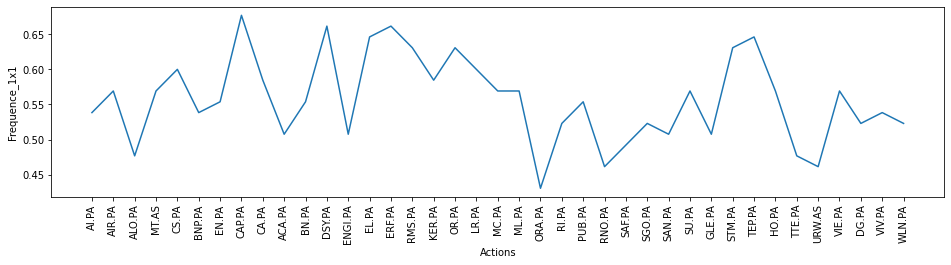

Index(['CAP.PA', 'DSY.PA', 'EL.PA', 'ERF.PA', 'TEP.PA'], dtype='object', name='Symbols')


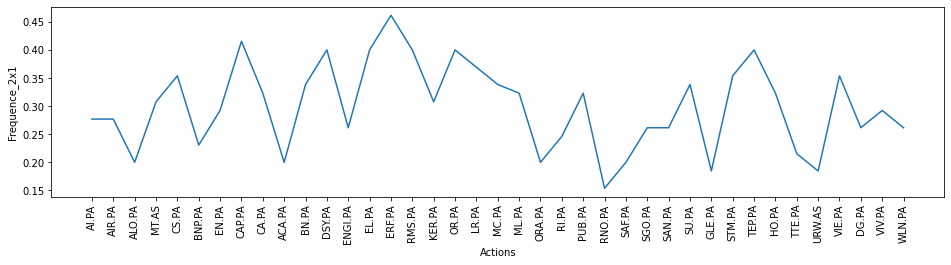

Index(['CAP.PA', 'DSY.PA', 'EL.PA', 'ERF.PA', 'RMS.PA', 'OR.PA', 'TEP.PA'], dtype='object', name='Symbols')


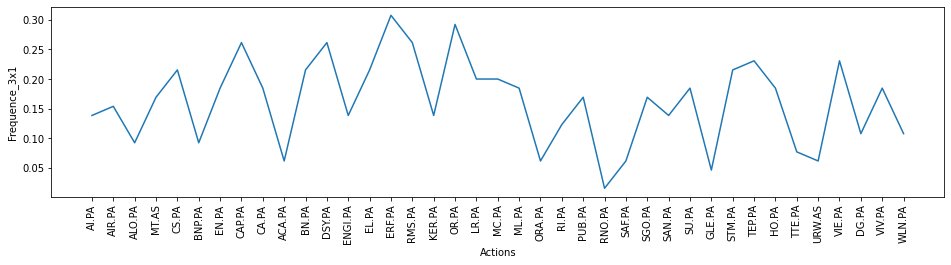

Index(['CAP.PA', 'DSY.PA', 'ERF.PA', 'RMS.PA', 'OR.PA'], dtype='object', name='Symbols')


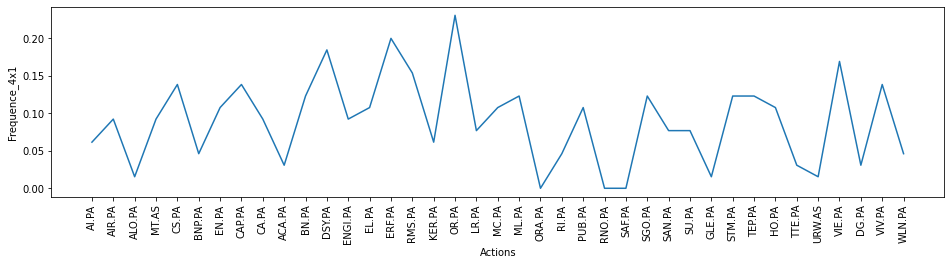

Index(['DSY.PA', 'ERF.PA', 'OR.PA', 'VIE.PA'], dtype='object', name='Symbols')


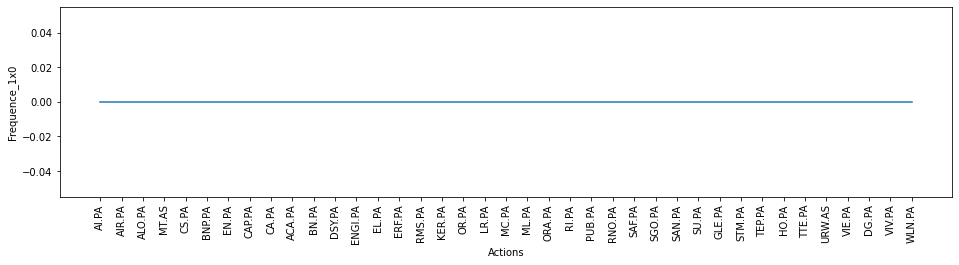

Index(['AI.PA', 'AIR.PA', 'ALO.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA',
       'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA', 'EL.PA',
       'ERF.PA', 'RMS.PA', 'KER.PA', 'OR.PA', 'LR.PA', 'MC.PA', 'ML.PA',
       'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA', 'SAF.PA', 'SGO.PA', 'SAN.PA',
       'SU.PA', 'GLE.PA', 'STM.PA', 'TEP.PA', 'HO.PA', 'TTE.PA', 'URW.AS',
       'VIE.PA', 'DG.PA', 'VIV.PA', 'WLN.PA'],
      dtype='object', name='Symbols')


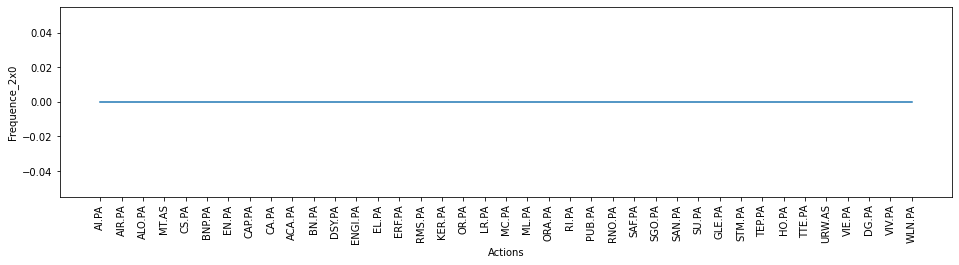

Index(['AI.PA', 'AIR.PA', 'ALO.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA',
       'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA', 'EL.PA',
       'ERF.PA', 'RMS.PA', 'KER.PA', 'OR.PA', 'LR.PA', 'MC.PA', 'ML.PA',
       'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA', 'SAF.PA', 'SGO.PA', 'SAN.PA',
       'SU.PA', 'GLE.PA', 'STM.PA', 'TEP.PA', 'HO.PA', 'TTE.PA', 'URW.AS',
       'VIE.PA', 'DG.PA', 'VIV.PA', 'WLN.PA'],
      dtype='object', name='Symbols')


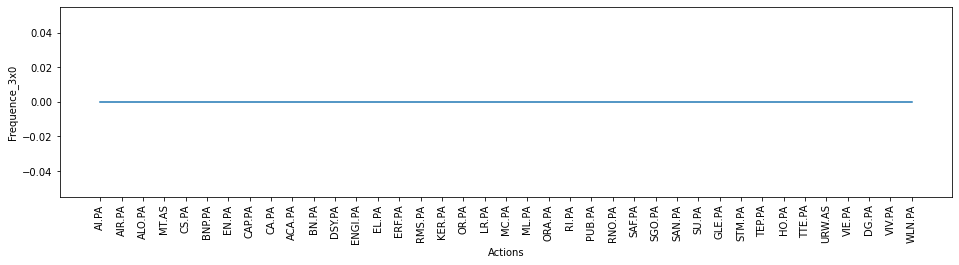

Index(['AI.PA', 'AIR.PA', 'ALO.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA',
       'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA', 'EL.PA',
       'ERF.PA', 'RMS.PA', 'KER.PA', 'OR.PA', 'LR.PA', 'MC.PA', 'ML.PA',
       'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA', 'SAF.PA', 'SGO.PA', 'SAN.PA',
       'SU.PA', 'GLE.PA', 'STM.PA', 'TEP.PA', 'HO.PA', 'TTE.PA', 'URW.AS',
       'VIE.PA', 'DG.PA', 'VIV.PA', 'WLN.PA'],
      dtype='object', name='Symbols')


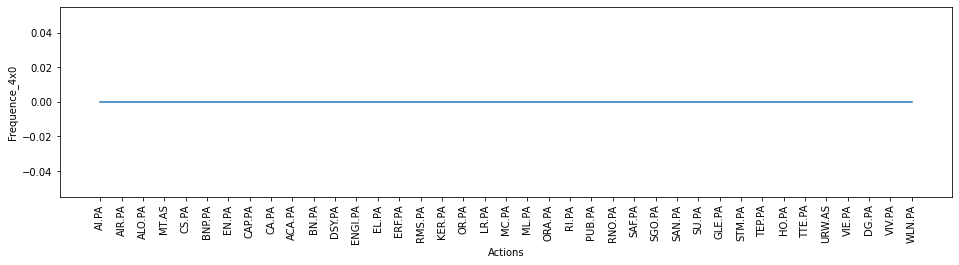

Index(['AI.PA', 'AIR.PA', 'ALO.PA', 'MT.AS', 'CS.PA', 'BNP.PA', 'EN.PA',
       'CAP.PA', 'CA.PA', 'ACA.PA', 'BN.PA', 'DSY.PA', 'ENGI.PA', 'EL.PA',
       'ERF.PA', 'RMS.PA', 'KER.PA', 'OR.PA', 'LR.PA', 'MC.PA', 'ML.PA',
       'ORA.PA', 'RI.PA', 'PUB.PA', 'RNO.PA', 'SAF.PA', 'SGO.PA', 'SAN.PA',
       'SU.PA', 'GLE.PA', 'STM.PA', 'TEP.PA', 'HO.PA', 'TTE.PA', 'URW.AS',
       'VIE.PA', 'DG.PA', 'VIV.PA', 'WLN.PA'],
      dtype='object', name='Symbols')


In [21]:
# Assemblage dataframe frequence df_bin et taux df_taux pour count, frequence, Moy_pos et Moy_Neg
df_freq_1 = df_bin.iloc[:, 65:65 + 2 * (inc_1 - 1)]
df_freq_0 = df_bin.iloc[:, 65 + 2 * (inc_1 - 1):]
df_tx_MoyPos = df_tx.iloc[:, 65:65 + inc_1]
df_tx_MoyNeg = df_tx.iloc[:, 65 + inc_1:]

print(df_freq_0)

for inc, my_data in enumerate(df_freq_1.columns):
    if 'Freq' in my_data:
        fig, ax = plt.subplots(figsize=(16, 3.5))
        ax.plot(df_freq_1.index, df_freq_1[my_data], label=my_data)
        ax.set_xlabel('Actions')
        ax.set_ylabel(my_data)
        #ax.legend()
        plt.xticks(rotation=90)
        plt.show()
        print(df_freq_1[my_data][df_freq_1[my_data] >= df_freq_1[my_data].quantile(q=0.9)].index)
        
for inc, my_data in enumerate(df_freq_0.columns):
    if 'Freq' in my_data:
        fig, ax = plt.subplots(figsize=(16, 3.5))
        ax.plot(df_freq_0.index, df_freq_0[my_data], label=my_data)
        ax.set_xlabel('Actions')
        ax.set_ylabel(my_data)
        #ax.legend()
        plt.xticks(rotation=90)
        plt.show()
        print(df_freq_0[my_data][df_freq_0[my_data] >= df_freq_0[my_data].quantile(q=0.9)].index)

In [8]:
# Calcul gain si vente quand baisse
df_gain = df['Close']  # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
df_action = df['Close']  # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
    # Croissance => gain
#list_taux.append(df['Close'][action] - df['Close'][action].shift())
df_action = 100 / df['Close']
df_action1 = df_action.copy()
df_action2 = df_action.copy()
df_gain = df_action.shift(1) * df['Close'] - 100
# Achat
df_gain[df_taux.shift(1) < 0] = ((100 / df['Close'].shift(1)) * df['Close']) - 100
df_action1[df_taux.shift(1) < 0] = 'Achat'
df_action2[df_taux.shift(1) < 0] = 100 / df['Close'].shift(1)
# Vente
df_gain[(df_taux.shift(1) >= 0) & (df_taux < 0)] = 0
df_action1[(df_taux.shift(1) >= 0) & (df_taux < 0)] = 'Vente'
df_action2[(df_taux.shift(1) >= 0) & (df_taux < 0)] = 0
# Calcul gain 1 avec achat précédent
df_action1[(df_taux >= 0) & (df_taux.shift(1) >= 0)] = 'Gain1' #100 / df['Close'].shift(1)
df_action2[(df_taux >= 0) & (df_taux.shift(1) >= 0)] = df_action.shift(2)
df_gain[(df_taux >= 0) & (df_taux.shift(1) >= 0)] = df_action.shift(2) * df['Close'] - 100
# Calcul gain X avec gain X-1 précédent
for inc in range(1, len(df_gain.index), 1):
    df_action1[(df_taux >= 0) & (df_action1.shift(1) == 'Gain' + str(inc))] = 'Gain' + str(inc + 1) #100 / df['Close'].shift(1)
    df_action2[(df_taux >= 0) & (df_action1.shift(1) == 'Gain' + str(inc))] = df_action.shift(inc + 2)
    df_gain[(df_taux >= 0) & (df_action1.shift(1) == 'Gain' + str(inc))] = df_action.shift(inc + 2) * df['Close'] - 100
# Double baisse minimum => Nothing or 0
df_action1[(df_taux < 0) & (df_taux.shift(1) < 0)] = 'Nothing' #0
df_action2[(df_taux < 0) & (df_taux.shift(1) < 0)] = 0
df_gain[(df_taux < 0) & (df_taux.shift(1) < 0)] = 0
# Mise a 0 du gain n-1 quand gain n
df_gain[(df_taux >= 0) & (df_taux.shift(-1) >= 0)] = 0

df_tmp = pd.concat([df['Close'].iloc[0:33, 0], df_taux.iloc[0:33, 0], df_action.iloc[0:33, 0], df_action1.iloc[0:33, 0],
                    df_action2.iloc[0:33, 0], df_gain.iloc[0:33, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[33:66, 0], df_taux.iloc[33:66, 0], df_action.iloc[33:66, 0], df_action1.iloc[33:66, 0],
                    df_action2.iloc[33:66, 0], df_gain.iloc[33:66, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
#df_tmp = pd.concat([df['Close'].iloc[:, 0], df_taux.iloc[:, 0], df_action.iloc[:, 0], df_action1.iloc[:, 0],
#                    df_action2.iloc[:, 0], df_gain.iloc[:, 0]], axis=1)
#df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
#print(f"La gain avec vente optimale est de : {df_tmp['Gain'].sum()}")
#print(df_gain)

# Integration des données de vente/achat optimale dans le dataframe df
df_action1.columns = pd.MultiIndex(levels = [['Type_Action'], df_action1.columns], 
                               codes = [[0] * len(df_action1.columns), range(0,len(df_action1.columns),1)])
df_action2.columns = pd.MultiIndex(levels = [['Nbr_Action'], df_action2.columns], 
                               codes = [[0] * len(df_action2.columns), range(0,len(df_action2.columns),1)])
df_gain.columns = pd.MultiIndex(levels = [['Gain'], df_gain.columns], 
                               codes = [[0] * len(df_gain.columns), range(0,len(df_gain.columns),1)])
df_tmp = pd.concat([df_action1, df_action2, df_gain], axis=1)
df = pd.concat([df, df_tmp], axis = 1)

                 Close      Taux  Nbr_Action    Action  Nbr_Action-1      Gain
Date                                                                          
2021-06-01  139.619995       NaN    0.716230   0.71623      0.716230       NaN
2021-06-02  140.619995  1.000000    0.711136  0.711136      0.711136  0.716230
2021-06-03  140.559998 -0.059998    0.711440     Vente      0.000000  0.000000
2021-06-04  140.919998  0.360001    0.709622     Achat      0.711440  0.000000
2021-06-07  141.000000  0.080002    0.709220     Gain1      0.711440  0.313035
2021-06-08  140.860001 -0.139999    0.709925     Vente      0.000000  0.000000
2021-06-09  141.979996  1.119995    0.704325     Achat      0.709925  0.795112
2021-06-10  141.320007 -0.659988    0.707614     Vente      0.000000  0.000000
2021-06-11  140.679993 -0.640015    0.710833   Nothing      0.000000  0.000000
2021-06-14  140.860001  0.180008    0.709925     Achat      0.710833  0.000000
2021-06-15  144.539993  3.679993    0.691850     Gai

In [9]:
# Calcul gain si vente quand baisse sur 2 jours et rachat si remonte
df_gain_bis = df['Close']  # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
df_action_bis = df['Close']  # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
    # Croissance => gain
#list_taux.append(df['Close'][action] - df['Close'][action].shift())
df_action_bis = 100 / df['Close']
df_action1_bis = df_action_bis.copy()
df_action2_bis = df_action_bis.copy()
df_gain_bis = df_action_bis.shift(1) * df['Close'] - 100
# Achat
df_gain_bis[(df_taux.shift(2) < 0) &
            (df_taux.shift(1) < 0) & (df_taux > 0)] = 0 #((100 / df['Close'].shift(1)) * df['Close']) - 100
df_action1_bis[(df_taux.shift(2) < 0) &
               (df_taux.shift(1) < 0) & (df_taux > 0)] = 'Achat'
df_action2_bis[(df_taux.shift(2) < 0) &
               (df_taux.shift(1) < 0) & (df_taux > 0)] = 100 / df['Close']
# Vente
df_gain_bis[(df_taux.shift(2) >= 0) & (df_taux.shift(1) < 0) & (df_taux < 0)] = 0
df_action1_bis[(df_taux.shift(2) >= 0) & (df_taux.shift(1) < 0) & (df_taux < 0)] = 'Vente'
df_action2_bis[(df_taux.shift(2) >= 0) & (df_taux.shift(1) < 0) & (df_taux < 0)] = 0
# Calcul gain 1 au départ
df_action1_bis.iloc[1] = 'Gain' #100 / df['Close'].shift(1)
df_action2_bis.iloc[1] = df_action.iloc[0]
df_gain_bis.iloc[1] = 0 #df_action.iloc[0] * df['Close'].iloc[1] - 100
# Calcul gain 1 avec achat précédent
df_action1_bis[df_action1_bis.shift(1) == 'Achat'] = 'Gain' #100 / df['Close'].shift(1)
df_action2_bis[df_action1_bis.shift(1) == 'Achat'] = df_action2_bis.shift(1)
df_gain_bis[df_action1_bis.shift(1) == 'Achat'] = 0 #df_action.shift(2) * df['Close'] - 100
# Calcul gain X avec gain X-1 précédent
for inc in range(1, len(df_gain_bis.index), 1):
    df_action1_bis[(df_action1_bis != 'Vente') &
                   (df_action1_bis.shift(1) == 'Gain')] = 'Gain' #100 / df['Close'].shift(1)
    df_action2_bis[(df_action1_bis != 'Vente') &
                   (df_action1_bis.shift(1) == 'Gain')] = df_action2_bis.shift(1)
    df_gain_bis[(df_action1_bis != 'Vente') &
                (df_action1_bis.shift(1) == 'Gain')] = 0 #df_action2_bis.shift(inc) * df['Close'] - 100
# Multiple baisse minimum => Nothing or 0
    # Nothing avec vente précédent
df_action1_bis[(df_action1_bis.shift(1) == 'Vente') & (df_action1_bis != 'Achat')] = 'Nothing'
df_action2_bis[(df_action1_bis.shift(1) == 'Vente') & (df_action1_bis != 'Achat')] = 0
df_gain_bis[(df_action1_bis.shift(1) == 'Vente') & (df_action1_bis != 'Achat')] = 0
    # Nothing avec Nothing précédent
for inc in range(1, len(df_gain_bis.index), 1):
    df_action1_bis[(df_action1_bis != 'Achat') & (df_action1_bis.shift(1) == 'Nothing')] = 'Nothing'
    df_action2_bis[(df_action1_bis != 'Achat') & (df_action1_bis.shift(1) == 'Nothing')] = 0
    df_gain_bis[(df_action1_bis != 'Achat') & (df_action1_bis.shift(1) == 'Nothing')] = 0
# Calcul gain a la vente
df_gain_bis[df_action1_bis == 'Vente'] = df_action2_bis.shift(1) * df['Close'] - 100
for inc in range(0, len(df_gain_bis.columns), 1):
    if df_action1_bis.iloc[-1, inc] == 'Gain':
        df_gain_bis.iloc[-1, inc] = df_action2_bis.iloc[-1, inc] * df['Close'].iloc[-1, inc] - 100


df_tmp = pd.concat([df['Close'].iloc[0:33, 0], df_taux.iloc[0:33, 0], df_action_bis.iloc[0:33, 0], df_action1_bis.iloc[0:33, 0],
                    df_action2_bis.iloc[0:33, 0], df_gain_bis.iloc[0:33, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[33:66, 0], df_taux.iloc[33:66, 0], df_action_bis.iloc[33:66, 0], df_action1_bis.iloc[33:66, 0],
                    df_action2_bis.iloc[33:66, 0], df_gain_bis.iloc[33:66, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
#df_tmp = pd.concat([df['Close'].iloc[:, 0], df_taux.iloc[:, 0], df_action.iloc[:, 0], df_action1.iloc[:, 0],
#                    df_action2.iloc[:, 0], df_gain.iloc[:, 0]], axis=1)
#df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
#print(f"La gain avec vente optimale est de : {df_tmp['Gain'].sum()}")
#print(df_gain)

# Integration des données de vente/achat optimale dans le dataframe df
df_action1_bis.columns = pd.MultiIndex(levels = [['Type_Action_Simu'], df_action1_bis.columns], 
                               codes = [[0] * len(df_action1_bis.columns), range(0,len(df_action1_bis.columns),1)])
df_action2_bis.columns = pd.MultiIndex(levels = [['Nbr_Action_Simu'], df_action2_bis.columns], 
                               codes = [[0] * len(df_action2_bis.columns), range(0,len(df_action2_bis.columns),1)])
df_gain_bis.columns = pd.MultiIndex(levels = [['Gain_Simu'], df_gain_bis.columns], 
                               codes = [[0] * len(df_gain_bis.columns), range(0,len(df_gain_bis.columns),1)])
df_tmp = pd.concat([df_action1_bis, df_action2_bis, df_gain_bis], axis=1)
df = pd.concat([df, df_tmp], axis = 1)

                 Close      Taux  Nbr_Action   Action  Nbr_Action-1      Gain
Date                                                                         
2021-06-01  139.619995       NaN    0.716230  0.71623      0.716230       NaN
2021-06-02  140.619995  1.000000    0.711136     Gain      0.716230  0.000000
2021-06-03  140.559998 -0.059998    0.711440     Gain      0.716230  0.000000
2021-06-04  140.919998  0.360001    0.709622     Gain      0.716230  0.000000
2021-06-07  141.000000  0.080002    0.709220     Gain      0.716230  0.000000
2021-06-08  140.860001 -0.139999    0.709925     Gain      0.716230  0.000000
2021-06-09  141.979996  1.119995    0.704325     Gain      0.716230  0.000000
2021-06-10  141.320007 -0.659988    0.707614     Gain      0.716230  0.000000
2021-06-11  140.679993 -0.640015    0.710833    Vente      0.000000  0.759202
2021-06-14  140.860001  0.180008    0.709925    Achat      0.709925  0.000000
2021-06-15  144.539993  3.679993    0.691850     Gain      0.709

In [10]:
# Calcul gain si vente quand baisse moyenne glissante et rachat si remonte

# Calcul des moyennes glissantes
df_moy2 = df['Close'].rolling(window=2).mean() # Création dataframe df_moy2 moyenne glissante 2 jours sur valeur à la fermeture
df_moy5 = df['Close'].rolling(window=5).mean() # Création dataframe df_moy5 moyenne glissante 5 jours sur valeur à la fermeture
df_moy10 = df['Close'].rolling(window=10).mean() # Création dataframe df_moy10 moyenne glissante 10 jours sur valeur à la fermeture
df_moy15 = df['Close'].rolling(window=15).mean() # Création dataframe df_moy15 moyenne glissante 15 jours sur valeur à la fermeture
df_moy20 = df['Close'].rolling(window=20).mean() # Création dataframe df_moy20 moyenne glissante 20 jours sur valeur à la fermeture

# Calcul taux moyennes
df_moy2 = df_moy2 - df_moy2.shift()
df_moy5 = df_moy5 - df_moy5.shift()
df_moy10 = df_moy10 - df_moy10.shift()
df_moy15 = df_moy15 - df_moy15.shift()
df_moy20 = df_moy20 - df_moy20.shift()

df_gain_ter = df['Close'] # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
df_action_ter = df['Close']  # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
    # Croissance => gain
#list_taux.append(df['Close'][action] - df['Close'][action].shift())
df_action_ter = 100 / df['Close']
df_action1_ter = df_action_ter.copy()
df_action2_ter = df_action_ter.copy()
df_gain_ter = df_action_ter.shift(1) * df['Close'] - 100
# Calcul gain 1 au départ
df_action1_ter.iloc[1] = 'Gain' #100 / df['Close'].shift(1)
df_action2_ter.iloc[1] = df_action.iloc[0]
df_gain_ter.iloc[1] = 0 #df_action.iloc[0] * df['Close'].iloc[1] - 100
# Vente
df_gain_ter[(df_taux < 0) & (df_moy2 < 0)] = 0
df_action1_ter[(df_taux < 0) & (df_moy2 < 0)] = 'Vente'
df_action2_ter[(df_taux < 0) & (df_moy2 < 0)] = 0
# Achat
df_gain_ter[(df_taux >= 0) & (df_moy5 >= 0)] = 0
df_action1_ter[(df_taux >= 0) & (df_moy5 >= 0)] = 'Achat'
df_action2_ter[(df_taux >= 0) & (df_moy5 >= 0)] = 100 / df['Close']
# Gain si Achat avant et pas vente
df_gain_ter[(df_action1_ter.shift(1) == 'Achat') & (df_action1_ter != 'Vente')] = 0
df_action1_ter[(df_action1_ter.shift(1) == 'Achat') & (df_action1_ter != 'Vente')] = 'Gain'
df_action2_ter[(df_action1_ter.shift(1) == 'Achat') & (df_action1_ter != 'Vente')] = df_action2_ter.shift(1)
# Gain si Achat avant et 'Achat' après
df_gain_ter[(df_action1_ter.shift(1) == 'Gain') & (df_action1_ter.shift(-1) == 'Gain')] = 0
df_action1_ter[(df_action1_ter.shift(1) == 'Gain') & (df_action1_ter.shift(-1) == 'Gain')] = 'Gain'
df_action2_ter[(df_action1_ter.shift(1) == 'Gain') & (df_action1_ter.shift(-1) == 'Gain')] = df_action2_ter.shift(1)
# Multiple baisse minimum => Nothing or 0
    # Nothing avec vente précédent
df_action1_ter[(df_action1_ter.shift(1) == 'Vente') & (df_action1_ter != 'Achat')] = 'Nothing'
df_action2_ter[(df_action1_ter.shift(1) == 'Vente') & (df_action1_ter != 'Achat')] = 0
df_gain_ter[(df_action1_ter.shift(1) == 'Vente') & (df_action1_ter != 'Achat')] = 0
    # Nothing avec Nothing précédent
for inc in range(1, len(df_gain_ter.index), 1):
    df_action1_ter[(df_action1_ter != 'Achat') & (df_action1_ter.shift(1) == 'Nothing')] = 'Nothing'
    df_action2_ter[(df_action1_ter != 'Achat') & (df_action1_ter.shift(1) == 'Nothing')] = 0
    df_gain_ter[(df_action1_ter != 'Achat') & (df_action1_ter.shift(1) == 'Nothing')] = 0
# Calcul gain X avec gain X-1 précédent
for inc in range(1, len(df_gain_ter.index), 1):
    df_action1_ter[(df_action1_ter != 'Vente') &
                   (df_action1_ter.shift(1) == 'Gain')] = 'Gain' #100 / df['Close'].shift(1)
    df_action2_ter[(df_action1_ter != 'Vente') &
                   (df_action1_ter.shift(1) == 'Gain')] = df_action2_ter.shift(1)
    df_gain_ter[(df_action1_ter != 'Vente') &
                (df_action1_ter.shift(1) == 'Gain')] = 0 #df_action2_bis.shift(inc) * df['Close'] - 100
# Calcul gain au moment de la vente
df_gain_ter[df_action1_ter == 'Vente'] = df_action2_ter.shift(1) * df['Close'] - 100
for inc in range(0, len(df_gain_ter.columns), 1):
    if df_action1_ter.iloc[-1, inc] == 'Gain':
        df_gain_ter.iloc[-1, inc] = df_action2_ter.iloc[-1, inc] * df['Close'].iloc[-1, inc] - 100

df_tmp = pd.concat([df['Close'].iloc[0:33, 0], df_taux.iloc[0:33, 0], df_moy2.iloc[0:33, 0], df_moy5.iloc[0:33, 0],
                    df_action_ter.iloc[0:33, 0], df_action1_ter.iloc[0:33, 0],
                    df_action2_ter.iloc[0:33, 0], df_gain_ter.iloc[0:33, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Moy2', 'Moy5', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[33:66, 0], df_taux.iloc[33:66, 0], df_moy2.iloc[33:66, 0], df_moy5.iloc[33:66, 0],
                    df_action_ter.iloc[33:66, 0], df_action1_ter.iloc[33:66, 0],
                    df_action2_ter.iloc[33:66, 0], df_gain_ter.iloc[33:66, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Moy2', 'Moy5', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[0:33, 0], df_action_ter.iloc[0:33, 0], df_action1_ter.iloc[0:33, 0],
                    df_action2_ter.iloc[0:33, 0], df_gain_ter.iloc[0:33, 0]], axis=1)
df_tmp.columns = ['Close', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[33:66, 0], df_action_ter.iloc[33:66, 0], df_action1_ter.iloc[33:66, 0],
                    df_action2_ter.iloc[33:66, 0], df_gain_ter.iloc[33:66, 0]], axis=1)
df_tmp.columns = ['Close', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)

#df_tmp = pd.concat([df['Close'].iloc[:, 0], df_taux.iloc[:, 0], df_action.iloc[:, 0], df_action1.iloc[:, 0],
#                    df_action2.iloc[:, 0], df_gain.iloc[:, 0]], axis=1)
#df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
#print(f"La gain avec vente optimale est de : {df_tmp['Gain'].sum()}")
#print(df_gain)

# Integration des données de vente/achat optimale dans le dataframe df
df_action1_ter.columns = pd.MultiIndex(levels = [['Type_Action_Simu1'], df_action1_ter.columns], 
                               codes = [[0] * len(df_action1_ter.columns), range(0,len(df_action1_ter.columns),1)])
df_action2_ter.columns = pd.MultiIndex(levels = [['Nbr_Action_Simu1'], df_action2_ter.columns], 
                               codes = [[0] * len(df_action2_ter.columns), range(0,len(df_action2_ter.columns),1)])
df_gain_ter.columns = pd.MultiIndex(levels = [['Gain_Simu1'], df_gain_ter.columns], 
                               codes = [[0] * len(df_gain_ter.columns), range(0,len(df_gain_ter.columns),1)])
df_tmp = pd.concat([df_action1_ter, df_action2_ter, df_gain_ter], axis=1)
#df = pd.concat([df, df_tmp], axis = 1)


                 Close      Taux      Moy2      Moy5  Nbr_Action   Action  \
Date                                                                        
2021-06-01  139.619995       NaN       NaN       NaN    0.716230  0.71623   
2021-06-02  140.619995  1.000000       NaN       NaN    0.711136     Gain   
2021-06-03  140.559998 -0.059998  0.470001       NaN    0.711440     Gain   
2021-06-04  140.919998  0.360001  0.150002       NaN    0.709622     Gain   
2021-06-07  141.000000  0.080002  0.220001       NaN    0.709220     Gain   
2021-06-08  140.860001 -0.139999 -0.029999  0.248001    0.709925    Vente   
2021-06-09  141.979996  1.119995  0.489998  0.272000    0.704325    Achat   
2021-06-10  141.320007 -0.659988  0.230003  0.152002    0.707614     Gain   
2021-06-11  140.679993 -0.640015 -0.650002 -0.048001    0.710833    Vente   
2021-06-14  140.860001  0.180008 -0.230003 -0.028000    0.709925  Nothing   
2021-06-15  144.539993  3.679993  1.930000  0.735999    0.691850    Achat   

In [11]:
# Calcul gain si vente quand baisse moyenne glissante et rachat si remonte

# Calcul des moyennes glissantes
df_moy2 = df['Close'].rolling(window=2).mean() # Création dataframe df_moy2 moyenne glissante 2 jours sur valeur à la fermeture
df_moy5 = df['Close'].rolling(window=5).mean() # Création dataframe df_moy5 moyenne glissante 5 jours sur valeur à la fermeture
df_moy10 = df['Close'].rolling(window=10).mean() # Création dataframe df_moy10 moyenne glissante 10 jours sur valeur à la fermeture
df_moy15 = df['Close'].rolling(window=15).mean() # Création dataframe df_moy15 moyenne glissante 15 jours sur valeur à la fermeture
df_moy20 = df['Close'].rolling(window=20).mean() # Création dataframe df_moy20 moyenne glissante 20 jours sur valeur à la fermeture

# Calcul taux moyennes
df_moy2 = df_moy2 - df_moy2.shift()
df_moy5 = df_moy5 - df_moy5.shift()
df_moy10 = df_moy10 - df_moy10.shift()
df_moy15 = df_moy15 - df_moy15.shift()
df_moy20 = df_moy20 - df_moy20.shift()

df_gain_ter = df['Close'] # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
df_action_ter = df['Close']  # Création dataframe df_gain avec extraction dataframe contenant que les valeur à la fermeture
    # Croissance => gain
#list_taux.append(df['Close'][action] - df['Close'][action].shift())
df_action_ter = 100 / df['Close']
df_action1_ter = df_action_ter.copy()
df_action2_ter = df_action_ter.copy()
df_gain_ter = df_action_ter.shift(1) * df['Close'] - 100
# Calcul gain 1 au départ
df_action1_ter.iloc[1] = 'Gain' #100 / df['Close'].shift(1)
df_action2_ter.iloc[1] = df_action.iloc[0]
df_gain_ter.iloc[1] = 0 #df_action.iloc[0] * df['Close'].iloc[1] - 100
# Vente
df_gain_ter[(df_taux < 0)] = 0
df_action1_ter[(df_taux < 0)] = 'Vente'
df_action2_ter[(df_taux < 0)] = 0
# Achat
df_gain_ter[(df_taux >= 0) & (df_taux.shift(1) < 0)] = 0
df_action1_ter[(df_taux >= 0) & (df_taux.shift(1) < 0)] = 'Achat'
df_action2_ter[(df_taux >= 0) & (df_taux.shift(1) < 0)] = 100 / df['Close']
# Gain si Achat avant et pas vente
df_gain_ter[(df_action1_ter.shift(1) == 'Achat') & (df_action1_ter != 'Vente')] = 0
df_action1_ter[(df_action1_ter.shift(1) == 'Achat') & (df_action1_ter != 'Vente')] = 'Gain'
df_action2_ter[(df_action1_ter.shift(1) == 'Achat') & (df_action1_ter != 'Vente')] = df_action2_ter.shift(1)
# Gain si Achat avant et 'Achat' après
df_gain_ter[(df_action1_ter.shift(1) == 'Gain') & (df_action1_ter.shift(-1) == 'Gain')] = 0
df_action1_ter[(df_action1_ter.shift(1) == 'Gain') & (df_action1_ter.shift(-1) == 'Gain')] = 'Gain'
df_action2_ter[(df_action1_ter.shift(1) == 'Gain') & (df_action1_ter.shift(-1) == 'Gain')] = df_action2_ter.shift(1)
# Multiple baisse minimum => Nothing or 0
    # Nothing avec vente précédent
df_action1_ter[(df_action1_ter.shift(1) == 'Vente') & (df_action1_ter != 'Achat')] = 'Nothing'
df_action2_ter[(df_action1_ter.shift(1) == 'Vente') & (df_action1_ter != 'Achat')] = 0
df_gain_ter[(df_action1_ter.shift(1) == 'Vente') & (df_action1_ter != 'Achat')] = 0
    # Nothing avec Nothing précédent
for inc in range(1, len(df_gain_ter.index), 1):
    df_action1_ter[(df_action1_ter != 'Achat') & (df_action1_ter.shift(1) == 'Nothing')] = 'Nothing'
    df_action2_ter[(df_action1_ter != 'Achat') & (df_action1_ter.shift(1) == 'Nothing')] = 0
    df_gain_ter[(df_action1_ter != 'Achat') & (df_action1_ter.shift(1) == 'Nothing')] = 0
# Calcul gain X avec gain X-1 précédent
for inc in range(1, len(df_gain_ter.index), 1):
    df_action1_ter[(df_action1_ter != 'Vente') &
                   (df_action1_ter.shift(1) == 'Gain')] = 'Gain' #100 / df['Close'].shift(1)
    df_action2_ter[(df_action1_ter != 'Vente') &
                   (df_action1_ter.shift(1) == 'Gain')] = df_action2_ter.shift(1)
    df_gain_ter[(df_action1_ter != 'Vente') &
                (df_action1_ter.shift(1) == 'Gain')] = 0 #df_action2_bis.shift(inc) * df['Close'] - 100
# Calcul gain au moment de la vente
df_gain_ter[df_action1_ter == 'Vente'] = df_action2_ter.shift(1) * df['Close'] - 100
for inc in range(0, len(df_gain_ter.columns), 1):
    if df_action1_ter.iloc[-1, inc] == 'Gain':
        df_gain_ter.iloc[-1, inc] = df_action2_ter.iloc[-1, inc] * df['Close'].iloc[-1, inc] - 100

df_tmp = pd.concat([df['Close'].iloc[0:33, 0], df_taux.iloc[0:33, 0], df_moy2.iloc[0:33, 0], df_moy5.iloc[0:33, 0],
                    df_action_ter.iloc[0:33, 0], df_action1_ter.iloc[0:33, 0],
                    df_action2_ter.iloc[0:33, 0], df_gain_ter.iloc[0:33, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Moy2', 'Moy5', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[33:66, 0], df_taux.iloc[33:66, 0], df_moy2.iloc[33:66, 0], df_moy5.iloc[33:66, 0],
                    df_action_ter.iloc[33:66, 0], df_action1_ter.iloc[33:66, 0],
                    df_action2_ter.iloc[33:66, 0], df_gain_ter.iloc[33:66, 0]], axis=1)
df_tmp.columns = ['Close', 'Taux', 'Moy2', 'Moy5', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[0:33, 0], df_action_ter.iloc[0:33, 0], df_action1_ter.iloc[0:33, 0],
                    df_action2_ter.iloc[0:33, 0], df_gain_ter.iloc[0:33, 0]], axis=1)
df_tmp.columns = ['Close', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)
df_tmp = pd.concat([df['Close'].iloc[33:66, 0], df_action_ter.iloc[33:66, 0], df_action1_ter.iloc[33:66, 0],
                    df_action2_ter.iloc[33:66, 0], df_gain_ter.iloc[33:66, 0]], axis=1)
df_tmp.columns = ['Close', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
print(df_tmp)

#df_tmp = pd.concat([df['Close'].iloc[:, 0], df_taux.iloc[:, 0], df_action.iloc[:, 0], df_action1.iloc[:, 0],
#                    df_action2.iloc[:, 0], df_gain.iloc[:, 0]], axis=1)
#df_tmp.columns = ['Close', 'Taux', 'Nbr_Action', 'Action', 'Nbr_Action-1', 'Gain']
#print(f"La gain avec vente optimale est de : {df_tmp['Gain'].sum()}")
#print(df_gain)

# Integration des données de vente/achat optimale dans le dataframe df
df_action1_ter.columns = pd.MultiIndex(levels = [['Type_Action_Simu1'], df_action1_ter.columns], 
                               codes = [[0] * len(df_action1_ter.columns), range(0,len(df_action1_ter.columns),1)])
df_action2_ter.columns = pd.MultiIndex(levels = [['Nbr_Action_Simu1'], df_action2_ter.columns], 
                               codes = [[0] * len(df_action2_ter.columns), range(0,len(df_action2_ter.columns),1)])
df_gain_ter.columns = pd.MultiIndex(levels = [['Gain_Simu1'], df_gain_ter.columns], 
                               codes = [[0] * len(df_gain_ter.columns), range(0,len(df_gain_ter.columns),1)])
df_tmp = pd.concat([df_action1_ter, df_action2_ter, df_gain_ter], axis=1)
df = pd.concat([df, df_tmp], axis = 1)


                 Close      Taux      Moy2      Moy5  Nbr_Action   Action  \
Date                                                                        
2021-06-01  139.619995       NaN       NaN       NaN    0.716230  0.71623   
2021-06-02  140.619995  1.000000       NaN       NaN    0.711136     Gain   
2021-06-03  140.559998 -0.059998  0.470001       NaN    0.711440    Vente   
2021-06-04  140.919998  0.360001  0.150002       NaN    0.709622    Achat   
2021-06-07  141.000000  0.080002  0.220001       NaN    0.709220     Gain   
2021-06-08  140.860001 -0.139999 -0.029999  0.248001    0.709925    Vente   
2021-06-09  141.979996  1.119995  0.489998  0.272000    0.704325    Achat   
2021-06-10  141.320007 -0.659988  0.230003  0.152002    0.707614    Vente   
2021-06-11  140.679993 -0.640015 -0.650002 -0.048001    0.710833  Nothing   
2021-06-14  140.860001  0.180008 -0.230003 -0.028000    0.709925    Achat   
2021-06-15  144.539993  3.679993  1.930000  0.735999    0.691850     Gain   

In [13]:
# Transposition du dataframe
#df_bin = df_bin.T.dropna(axis=1)
df_taux = df_taux.T.dropna(axis=1)
df_gain = df_gain['Gain'].T.dropna(axis=1)
df_gain_bis = df_gain_bis['Gain_Simu'].T.dropna(axis=1)
df_gain_ter = df_gain_ter['Gain_Simu1'].T.dropna(axis=1)
#print(df_gain)

# Calcul du nombre de fois croissant et la fréquence
#df_bin['Count'] = df_bin.sum(axis=1)
#df_bin['Frequence'] = df_bin['Count'] / ( len(df_bin.columns) - 1 )
#print(df_bin['Frequence'])

# Affichage des actions avec plus de 2/3 de fréquence de croissance
print("Affichage des actions avec plus de 2/3 de fréquence de croissance")
df['Close'][df_bin[df_bin['Frequence'] >= 0.66].index].plot()
# Affichage des actions majoritairement avec décroissance (moins de 0,5)
print("Affichage des actions majoritairement avec décroissance (moins de 0,5)")
df['Close'][df_bin[df_bin['Frequence'] <= 0.5].index].plot()

# Recherche forte augmentation et forte diminution
df_taux['Moy_pos'] = df_taux[df_taux >= 0].mean(axis=1)
df_taux['Moy_neg'] = df_taux[df_taux < 0].mean(axis=1)
#print(f"Moyenne taux positif : {df_taux['Moy_pos']}")
#print(f"Moyenne taux négatif : {df_taux['Moy_neg']}")
print(f"Affichage de l'action ayant la moyenne de taux positif maximum (Action : "
      f"{df_taux[df_taux['Moy_pos'] == df_taux['Moy_pos'].max()].index.values}, "
      f"Moy : {df_taux['Moy_pos'].max()})")
df['Close'][df_taux[df_taux['Moy_pos'] == df_taux['Moy_pos'].max()].index].plot()
print(f"Affichage de l'action ayant la moyenne de taux positif minimum (Action : "
      f"{df_taux[df_taux['Moy_pos'] == df_taux['Moy_pos'].min()].index.values}, "
      f"Moy :{df_taux['Moy_pos'].min()})")
df['Close'][df_taux[df_taux['Moy_pos'] == df_taux['Moy_pos'].min()].index].plot()
print(f"Affichage de l'action ayant la moyenne de taux négatif maximum (Action : "
      f"{df_taux[df_taux['Moy_neg'] == df_taux['Moy_neg'].max()].index.values}, "
      f"Moy :{df_taux['Moy_neg'].max()})")
df['Close'][df_taux[df_taux['Moy_neg'] == df_taux['Moy_neg'].max()].index].plot()
print(f"Affichage de l'action ayant la moyenne de taux négatif minimum (Action : "
      f"{df_taux[df_taux['Moy_neg'] == df_taux['Moy_neg'].min()].index.values}, "
      f"Moy :{df_taux['Moy_neg'].min()})")
df['Close'][df_taux[df_taux['Moy_neg'] == df_taux['Moy_neg'].min()].index].plot()
# ATTENTION dépendant de la valeur de l'action => Il faudrait normailiser en divisant par la moyenne de l'action ?

for my_data in df_taux.index:
    df_taux.loc[my_data] = df_taux.loc[my_data] / df['Close'][my_data].mean()
    
#print(f"Moyenne taux positif : {df_taux['Moy_pos']}")
#print(f"Moyenne taux négatif : {df_taux['Moy_neg']}")
print(f"Affichage des actions ayant la moyenne de taux positif dans le quantile 0.9")
df['Close'][df_taux[df_taux['Moy_pos'] >= df_taux['Moy_pos'].quantile(0.9)].index].plot()
print(f"Affichage des actions ayant la moyenne de taux positif dans le quantile 0.1")
df['Close'][df_taux[df_taux['Moy_pos'] <= df_taux['Moy_pos'].quantile(0.1)].index].plot()
print(f"Affichage des actions ayant la moyenne de taux négatif dans le quantile 0.9")
df['Close'][df_taux[df_taux['Moy_neg'] >= df_taux['Moy_neg'].quantile(0.9)].index].plot()
print(f"Affichage des actions ayant la moyenne de taux négatif dans le quantile 0.1")
df['Close'][df_taux[df_taux['Moy_neg'] <= df_taux['Moy_neg'].quantile(0.1)].index].plot()

# Assemblage dataframe frequence df_bin et taux df_taux pour count, frequence, Moy_pos et Moy_Neg
df_selection = pd.concat([df_bin['Count_1x1'], df_bin['Frequence_1x1'], df_taux['Moy_pos'], df_taux['Moy_neg']], axis = 1)
# Rajout du gain sans vente
l_gain = list()
for action in df_selection.index:
    mise = 100
    nbr_action = mise / df['Close'][action][0]
    gain = nbr_action * df['Close'][action][-1] - mise
    l_gain.append(gain)
df_selection['Gain-ssVente'] = l_gain

# Rajout du gain avec vente optimale mise de 100 à chaque achat
#print(f"Somme gain : {df_gain.sum(axis=1)}")
df_selection['Gain-avVenteOpti'] = df_gain.sum(axis=1)

# Rajout du gain si vente quand baisse sur 2 jours et rachat si remonte
#print(f"Somme gain : {df_gain.sum(axis=1)}")
df_selection['Gain-VenteSimu'] = df_gain_bis.sum(axis=1)

# Rajout du gain si vente quand baisse moyenne glissante et rachat si remonte
#print(f"Somme gain : {df_gain.sum(axis=1)}")
df_selection['Gain-VenteSimu1'] = df_gain_ter.sum(axis=1)
for action in df_selection.index:
    print(f"L'action : {action}\n     affiche un gain de {df_selection['Gain-ssVente'][action]}\n     "
          f"affiche un gain de "
          f"{df_selection['Gain-avVenteOpti'][action]} (avec vente optimale mise de 100 à chaque achat)\n     "
          f"affiche un gain de "
          f"{df_selection['Gain-VenteSimu'][action]} (avec vente quand baisse sur 2 jours et rachat si remonte)\n     "
          f"affiche un gain de "
          f"{df_selection['Gain-VenteSimu1'][action]} (avec vente quand baisse moyenne glissante et rachat si remonte)")
    
for my_data in df_selection.columns:
    fig, ax = plt.subplots(figsize=(16, 3.5))
    ax.plot(df_selection.index, df_selection[my_data], label=my_data)
    ax.set_xlabel('Actions')
    ax.set_ylabel(my_data)
    #ax.legend()
    plt.xticks(rotation=90)
    plt.show()
    
for my_data in df_selection.columns:
    plt.subplots(figsize=(16, 3.5))
    df_selection[my_data].hist(bins=20)
    plt.show()

KeyError: 'Gain'

In [11]:
#df = pd.concat([df, df_tmp], axis = 1)
print(df['Type_Action'].iloc[0:33, 0:6])
print(df['Type_Action'].iloc[33:66, 0:6])

print(df['Type_Action'].iloc[0:33, 6:12])
print(df['Type_Action'].iloc[33:66, 6:12])

print(df['Type_Action_Simu'].iloc[0:33, 0:6])
print(df['Type_Action_Simu'].iloc[33:66, 0:6])

print(df['Type_Action_Simu'].iloc[0:33, 6:12])
print(df['Type_Action_Simu'].iloc[33:66, 6:12])

Symbols        AI.PA    AIR.PA    ALO.PA     MT.AS     CS.PA    BNP.PA
Date                                                                  
2021-06-01   0.71623  0.919456  2.165909  3.631082  4.387889  1.763357
2021-06-02  0.711136  0.903342  2.158429  3.625159  4.376368  1.754386
2021-06-03     Vente     Vente     Vente     Vente     Vente     Gain1
2021-06-04     Achat     Achat   Nothing     Achat     Achat     Vente
2021-06-07     Gain1     Gain1     Achat     Vente     Gain1     Achat
2021-06-08     Vente     Vente     Vente   Nothing     Vente     Vente
2021-06-09     Achat     Achat     Achat   Nothing   Nothing   Nothing
2021-06-10     Vente     Vente     Vente     Achat   Nothing   Nothing
2021-06-11   Nothing     Achat     Achat     Gain1     Achat     Achat
2021-06-14     Achat     Gain1     Gain1     Vente     Gain1     Gain1
2021-06-15     Gain1     Gain2     Gain2   Nothing     Gain2     Gain2
2021-06-16     Gain2     Gain3     Vente   Nothing     Vente     Vente
2021-0

incrément = 0
q = 0.9743589743589743
best_F = Index(['CAP.PA'], dtype='object', name='Symbols')
best_G = Index(['MT.AS'], dtype='object', name='Symbols')
best_GssVente = Index(['ERF.PA'], dtype='object', name='Symbols')
best_GSimuVente = Index(['ERF.PA'], dtype='object', name='Symbols')
high_Mpos = Index(['URW.AS'], dtype='object', name='Symbols')
low_Mpos = Index(['ORA.PA'], dtype='object', name='Symbols')
low_Mneg = Index(['MT.AS'], dtype='object', name='Symbols')
high_Mneg = Index(['DSY.PA'], dtype='object', name='Symbols')
incrément = 1
q = 0.9487179487179487
best_F = Index(['CAP.PA', 'DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
best_G = Index(['MT.AS', 'URW.AS'], dtype='object', name='Symbols')
best_GssVente = Index(['DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
best_GSimuVente = Index(['DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
high_Mpos = Index(['MT.AS', 'URW.AS'], dtype='object', name='Symbols')
low_Mpos = Index(['ORA.PA', 'RI.PA'], dtype='object', name

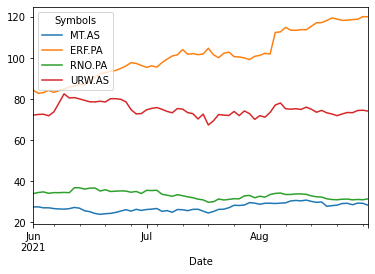

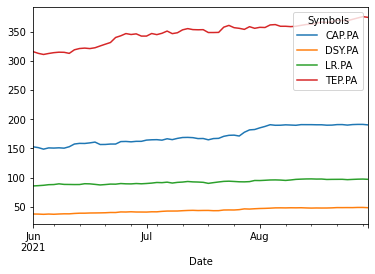

In [12]:
def recherche_best_action(df, nbr=1, q=1.0, inc=0):
    unitary_q = 1 / len(df.index)
    q -= unitary_q
    print(f"incrément = {inc}\nq = {q}")
    # Liste meilleur en frequence
    best_F = df[df['Frequence'] >= df['Frequence'].quantile(q)].index
    # Liste meilleur en gain avec vente optimale mise de 100 à chaque achat
    best_G = df[df['Gain-avVenteOpti'] >= df['Gain-avVenteOpti'].quantile(q)].index
    # Liste meilleur en gain vente si baisse sur 2 jours et rachat si remonte
    best_GSimuVente = df[df['Gain-VenteSimu'] >= df['Gain-VenteSimu'].quantile(q)].index
    # Liste meilleur en gain sans vente
    best_GssVente = df[df['Gain-ssVente'] >= df['Gain-ssVente'].quantile(q)].index
    # Liste meilleur en croissance
    low_Mpos = df[df['Moy_pos'] <= df['Moy_pos'].quantile(1-q)].index
    high_Mpos = df[df['Moy_pos'] >= df['Moy_pos'].quantile(q)].index
    # Liste meilleur en décroissance
    low_Mneg = df[df['Moy_neg'] <= df['Moy_neg'].quantile(1-q)].index
    high_Mneg = df[df['Moy_neg'] >= df['Moy_neg'].quantile(q)].index
    
    print(f"best_F = {best_F}\nbest_G = {best_G}\nbest_GssVente = {best_GssVente}\nbest_GSimuVente = {best_GSimuVente}\n"
          f"high_Mpos = {high_Mpos}\nlow_Mpos = {low_Mpos}\nlow_Mneg = {low_Mneg}\nhigh_Mneg = {high_Mneg}")
    if len(best_GSimuVente.intersection(high_Mpos)) > nbr - 1:
        return best_GSimuVente.intersection(high_Mpos).values
    elif len(best_G.intersection(high_Mpos)) > nbr - 1:
        return best_G.intersection(high_Mpos).values
    elif len(best_G.intersection(high_Mpos).intersection(low_Mneg)) > nbr - 1:
        return best_G.intersection(high_Mpos).intersection(low_Mneg).values
    elif len(best_F.intersection(best_G)) > nbr - 1:
        return best_F.intersection(best_G).values
    elif len(best_F.intersection(high_Mpos).intersection(high_Mneg)) > nbr - 1:
        return best_F.intersection(high_Mpos).intersection(high_Mneg).values
    elif len(best_F.intersection(high_Mneg)) > nbr - 1:
        return best_F.intersection(high_Mneg).values
    elif len(best_F.intersection(high_Mpos)) > nbr - 1:
        return best_F.intersection(high_Mpos).values
    elif len(best_F.intersection(low_Mneg)) > nbr - 1:
        return best_F.intersection(low_Mneg).values
    elif len(best_F.intersection(low_Mpos)) > nbr - 1:
        return best_F.intersection(low_Mpos).values
    else:
        inc += 1
        return recherche_best_action(df, nbr, q, inc)

def recherche_bestSimu_action(df, nbr=1, q=1.0, inc=0):
    unitary_q = 1 / len(df.index)
    q -= unitary_q
    print(f"incrément = {inc}\nq = {q}")
    # Liste meilleur en frequence
    best_F = df[df['Frequence'] >= df['Frequence'].quantile(q)].index
    # Liste meilleur en gain avec vente optimale mise de 100 à chaque achat
    best_G = df[df['Gain-avVenteOpti'] >= df['Gain-avVenteOpti'].quantile(q)].index
    # Liste meilleur en gain vente si baisse sur 2 jours et rachat si remonte
    best_GSimuVente = df[df['Gain-VenteSimu'] >= df['Gain-VenteSimu'].quantile(q)].index
    # Liste meilleur en gain vente quand baisse moyenne glissante et rachat si remonte
    best_GSimu1Vente = df[df['Gain-VenteSimu1'] >= df['Gain-VenteSimu1'].quantile(q)].index
    # Liste meilleur en gain sans vente
    best_GssVente = df[df['Gain-ssVente'] >= df['Gain-ssVente'].quantile(q)].index
    # Liste meilleur en croissance
    low_Mpos = df[df['Moy_pos'] <= df['Moy_pos'].quantile(1-q)].index
    high_Mpos = df[df['Moy_pos'] >= df['Moy_pos'].quantile(q)].index
    # Liste meilleur en décroissance
    low_Mneg = df[df['Moy_neg'] <= df['Moy_neg'].quantile(1-q)].index
    high_Mneg = df[df['Moy_neg'] >= df['Moy_neg'].quantile(q)].index
    
    print(f"best_F = {best_F}\nbest_G = {best_G}\nbest_GssVente = {best_GssVente}\nbest_GSimuVente = {best_GSimuVente}\n"
          f"high_Mpos = {high_Mpos}\nlow_Mpos = {low_Mpos}\nlow_Mneg = {low_Mneg}\nhigh_Mneg = {high_Mneg}")
    if len(best_GSimuVente.intersection(high_Mpos)) > nbr - 1:
        return best_GSimuVente.intersection(high_Mpos).values
    elif len(best_F.intersection(best_G)) > nbr - 1:
        return best_F.intersection(best_G).values
    elif len(best_F.intersection(high_Mpos).intersection(high_Mneg)) > nbr - 1:
        return best_F.intersection(high_Mpos).intersection(high_Mneg).values
    elif len(best_F.intersection(high_Mneg)) > nbr - 1:
        return best_F.intersection(high_Mneg).values
    elif len(best_F.intersection(high_Mpos)) > nbr - 1:
        return best_F.intersection(high_Mpos).values
    elif len(best_F.intersection(low_Mneg)) > nbr - 1:
        return best_F.intersection(low_Mneg).values
    elif len(best_F.intersection(low_Mpos)) > nbr - 1:
        return best_F.intersection(low_Mpos).values
    else:
        inc += 1
        return recherche_bestSimu_action(df, nbr, q, inc)
    
    
the_action = recherche_best_action(df_selection, 4)
print(f"the_action : {the_action}")
df['Close'][the_action].plot()
print(df_selection.loc[the_action])

the_action = recherche_bestSimu_action(df_selection, 4)
print(f"the_action : {the_action}")
df['Close'][the_action].plot()
print(df_selection.loc[the_action])

In [13]:
print(df_selection.iloc[0:20, 2:])
print(df_selection.iloc[21:40, 2:])

# Total gain
print(f"Comptabilisation gain positif :\n"
      f"    Sans Vente : {df_selection[df_selection['Gain-ssVente'] >= df_selection['Gain-ssVente'].quantile(0.8)]['Gain-ssVente'].sum()}\n"
      f"    Sans Vente : {df_selection[df_selection['Gain-ssVente'] >= df_selection['Gain-ssVente'].quantile(0.8)]['Gain-ssVente']}\n"
      f"    Vente Opti : {df_selection[df_selection['Gain-avVenteOpti'] >= df_selection['Gain-avVenteOpti'].quantile(0.8)]['Gain-avVenteOpti'].sum()}\n"
      f"    Vente Opti : {df_selection[df_selection['Gain-avVenteOpti'] >= df_selection['Gain-avVenteOpti'].quantile(0.8)]['Gain-avVenteOpti']}\n"
      f"    Vente Simu : {df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.8)]['Gain-VenteSimu'].sum()}\n"
      f"    Vente Simu : {df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.8)]['Gain-VenteSimu']}\n"
      f"    Vente Simu1 : {df_selection[df_selection['Gain-VenteSimu1'] >= df_selection['Gain-VenteSimu1'].quantile(0.8)]['Gain-VenteSimu1'].sum()}\n"
      f"    Vente Simu1 : {df_selection[df_selection['Gain-VenteSimu1'] >= df_selection['Gain-VenteSimu1'].quantile(0.8)]['Gain-VenteSimu1']}\n"
      f"    Liste Vente Simu : {df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.8)]['Gain-VenteSimu'].index}\n"
      f"    Nbr Vente Simu : {len(df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.8)]['Gain-VenteSimu'].index)}")


          Moy_pos   Moy_neg  Gain-ssVente  Gain-avVenteOpti  Gain-VenteSimu  \
Symbols                                                                       
AI.PA    0.007338 -0.005802      8.738012         26.060179        7.007917   
AIR.PA   0.010609 -0.011811      6.381018         40.485857        0.560837   
ALO.PA   0.008626 -0.015176    -21.160921         28.161010      -23.625718   
MT.AS    0.017070 -0.021440      3.104573         66.112320        2.177253   
CS.PA    0.007599 -0.009715      4.344009         30.681889        6.648801   
BNP.PA   0.010598 -0.014231     -5.254804         38.250588       -6.057874   
EN.PA    0.008045 -0.008186      5.133530         29.293753        0.114747   
CAP.PA   0.007932 -0.006210     24.606806         35.637605       22.578797   
CA.PA    0.007213 -0.010208     -0.148146         27.943260       -3.431936   
ACA.PA   0.010432 -0.011395     -1.959213         34.522258       -6.728468   
BN.PA    0.007557 -0.007298      6.269319         28

         Count  Frequence   Moy_pos   Moy_neg  Gain-ssVente  Gain-avVenteOpti  \
Symbols                                                                         
CS.PA     39.0   0.600000  0.007599 -0.009715      4.344009         30.681889   
ENGI.PA   33.0   0.507692  0.007162 -0.007783     -1.221296         24.147090   
KER.PA    38.0   0.584615  0.009406 -0.016652     -9.164420         36.473589   
MC.PA     37.0   0.569231  0.008809 -0.013266     -4.611169         33.316829   
ORA.PA    28.0   0.430769  0.005812 -0.006693     -7.924962         16.518377   
RI.PA     34.0   0.523077  0.005965 -0.007089     -1.712238         20.320653   
PUB.PA    36.0   0.553846  0.009051 -0.012045     -2.253519         33.476655   
RNO.PA    30.0   0.461538  0.015792 -0.015735     -7.554379         48.199587   
SGO.PA    34.0   0.523077  0.011181 -0.009216      9.998204         38.522032   
SAN.PA    33.0   0.507692  0.006858 -0.006444      2.049851         22.612519   
HO.PA     37.0   0.569231  0

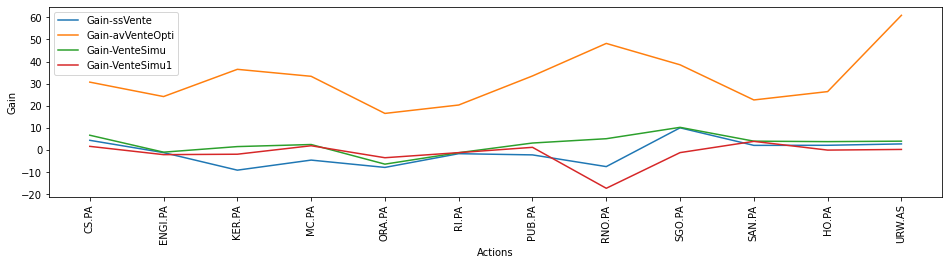

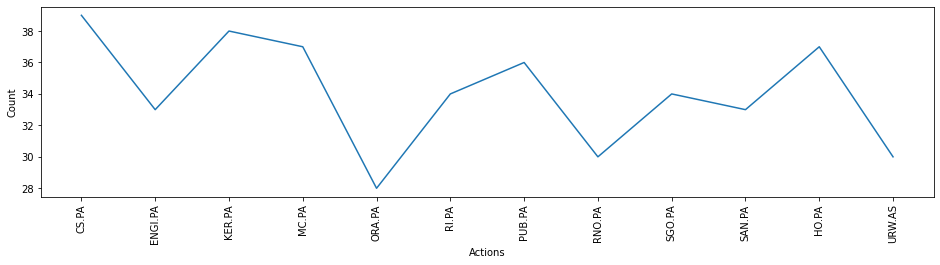

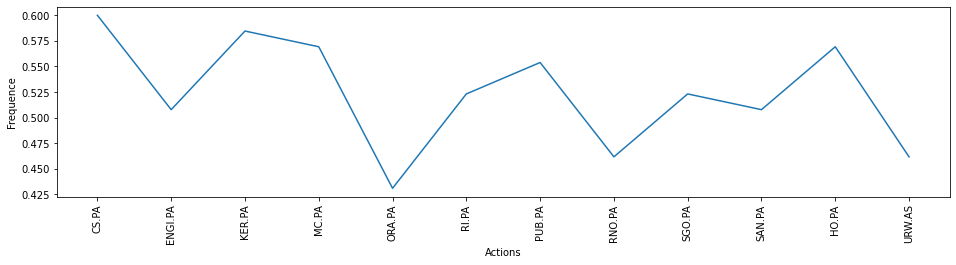

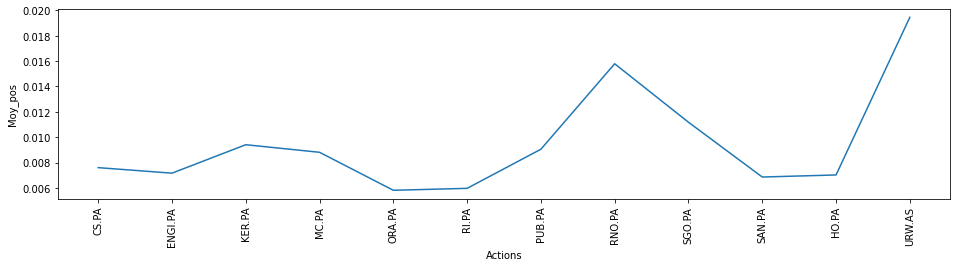

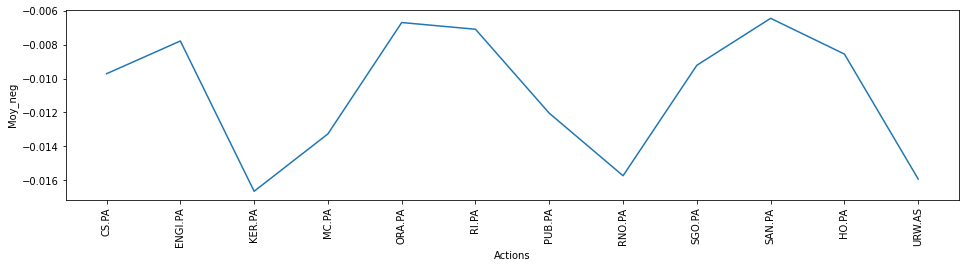

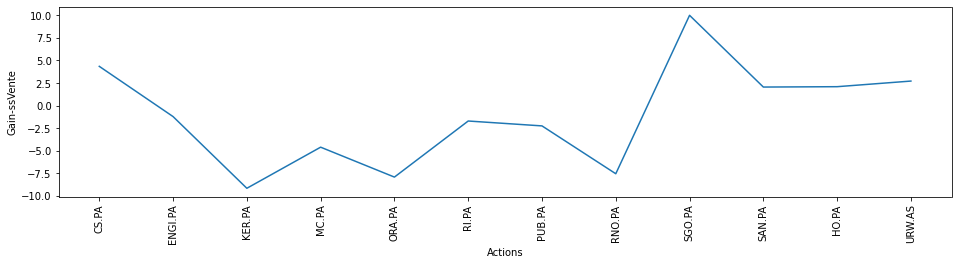

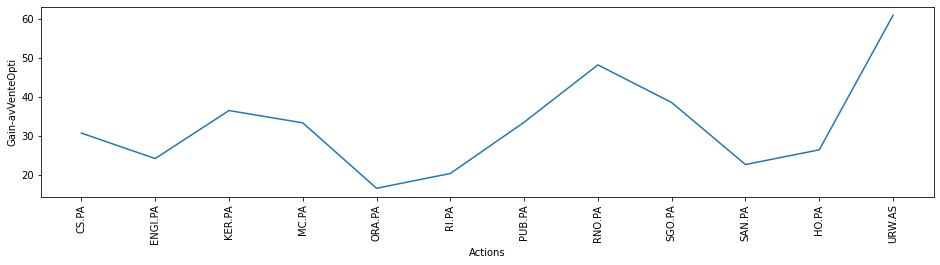

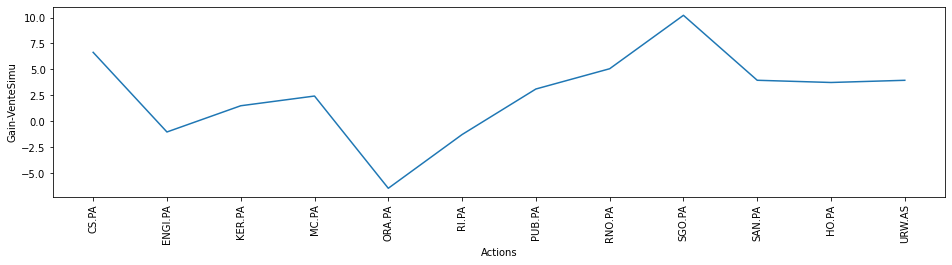

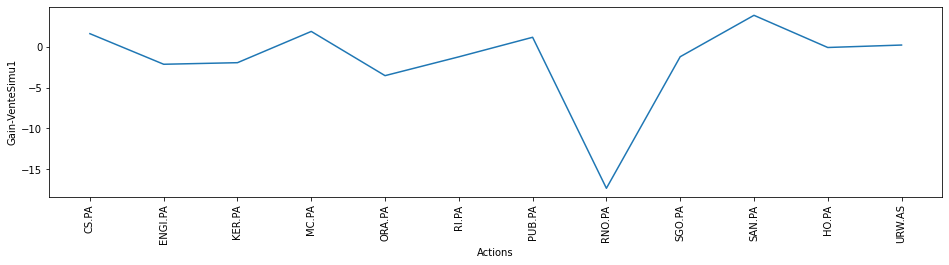

In [14]:
# Recherche cas où Simu meilleur que sans vente
print(df_selection[(df_selection['Gain-ssVente'] < df_selection['Gain-VenteSimu'])])

df_selection1 = df_selection[(df_selection['Gain-ssVente'] < df_selection['Gain-VenteSimu'])]

fig, ax = plt.subplots(figsize=(16, 3.5))
ax.plot(df_selection1.iloc[:, 4:].index, df_selection1.iloc[:, 4:])
ax.set_xlabel('Actions')
ax.set_ylabel('Gain')
ax.legend(df_selection1.iloc[:, 4:].columns)
plt.xticks(rotation=90)
plt.show()

for my_data in df_selection1.columns:
    fig, ax = plt.subplots(figsize=(16, 3.5))
    ax.plot(df_selection1.index, df_selection1[my_data], label=my_data)
    ax.set_xlabel('Actions')
    ax.set_ylabel(my_data)
    #ax.legend()
    plt.xticks(rotation=90)
    plt.show()

<p>L'idée est de rechercher les 4 meilleures actions pour l'achat sans revente pour 1 mois (=> les conditions de fréquence moy pos haute ou basse, moy neg haute ou basse qui ressortent) et aussi les 4 meilleures actions où la simu initiale et meilleure que celle sans revente => les conditions de fréquence moy pos haute ou basse, moy neg haute ou basse qui ressortent).</p>
<p><b>Une piste avec le calcul de la frequence de double baisse et la frequence des augmentations (double, triple, quadruple,...)</b></p>
<p><b><u>Faire appli avec critère fréquence pour sélection des 4 meilleures actions et conditions Simu initiale avec récup gain au 1er de chaque mois et actualisation sélection tous les jours (historique sur 3 mois)</u></b></p>

In [15]:
# Les 4 meilleures actions pour l'achat sans revente
l_BssRevente = df_selection[df_selection['Gain-ssVente'] >= df_selection['Gain-ssVente'].quantile(0.9)]['Gain-ssVente'].index.values
print(f"Les 4 meilleures actions pour l'achat sans revente sont :\n"
      f"    {l_BssRevente[0]} {l_BssRevente[1]} {l_BssRevente[2]} {l_BssRevente[3]}")

# Les 4 meilleures actions où la simu initiale et meilleure que celle sans revente
df_selection1 = df_selection[(df_selection['Gain-ssVente'] < df_selection['Gain-VenteSimu'])]
df_selection1['Diff'] = df_selection['Gain-VenteSimu'] - df_selection['Gain-ssVente']
#print(pd.concat([df_selection1['Gain-VenteSimu'], df_selection1['Diff']], axis=1))

l_BSimu = df_selection1[df_selection1['Gain-VenteSimu'] >= df_selection1['Gain-VenteSimu'].quantile((len(df_selection1.index) - 4) / len(df_selection1.index))]['Gain-VenteSimu'].index.values
print(f"Les 4 meilleures actions où la simu initiale et meilleure que celle sans revente sont :\n"
      f"    {l_BSimu[0]} {l_BSimu[1]} {l_BSimu[2]} {l_BSimu[3]}")

l_DeltaSimu = df_selection1[df_selection1['Diff'] >= df_selection1['Diff'].quantile((len(df_selection1.index) - 4) / len(df_selection1.index))]['Diff'].index.values
print(f"Les 4 meilleures actions où le delta entre la simu initiale et celle sans revente est le meilleur sont :\n"
      f"    {l_DeltaSimu[0]} {l_DeltaSimu[1]} {l_DeltaSimu[2]} {l_DeltaSimu[3]}")


Les 4 meilleures actions pour l'achat sans revente sont :
    CAP.PA DSY.PA ERF.PA STM.PA
Les 4 meilleures actions où la simu initiale et meilleure que celle sans revente sont :
    CS.PA RNO.PA SGO.PA SAN.PA
Les 4 meilleures actions où le delta entre la simu initiale et celle sans revente est le meilleur sont :
    KER.PA MC.PA PUB.PA RNO.PA


/var/folders/nt/cmtq2_x168bcy7yfttbybmfc0000gn/T/ipykernel_1698/1049584467.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selection1['Diff'] = df_selection['Gain-VenteSimu'] - df_selection['Gain-ssVente']


incrément = 0
q = 0.9743589743589743
best_F = Index(['CAP.PA'], dtype='object', name='Symbols')
best_G = Index(['MT.AS'], dtype='object', name='Symbols')
best_GssVente = Index(['ERF.PA'], dtype='object', name='Symbols')
best_GSimuVente = Index(['ERF.PA'], dtype='object', name='Symbols')
high_Mpos = Index(['URW.AS'], dtype='object', name='Symbols')
low_Mpos = Index(['ORA.PA'], dtype='object', name='Symbols')
low_Mneg = Index(['MT.AS'], dtype='object', name='Symbols')
high_Mneg = Index(['DSY.PA'], dtype='object', name='Symbols')
incrément = 1
q = 0.9487179487179487
best_F = Index(['CAP.PA', 'DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
best_G = Index(['MT.AS', 'URW.AS'], dtype='object', name='Symbols')
best_GssVente = Index(['DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
best_GSimuVente = Index(['DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
high_Mpos = Index(['MT.AS', 'URW.AS'], dtype='object', name='Symbols')
low_Mpos = Index(['ORA.PA', 'RI.PA'], dtype='object', name

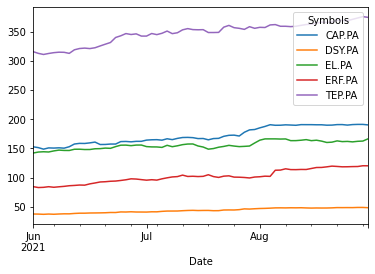

In [16]:
def recherche_best_action_ssRevente(df, nbr=1, q=1.0, inc=0):
    unitary_q = 1 / len(df.index)
    q -= unitary_q
    print(f"incrément = {inc}\nq = {q}")
    # Liste meilleur en frequence
    best_F = df[df['Frequence'] >= df['Frequence'].quantile(q)].index
    # Liste meilleur en gain avec vente optimale mise de 100 à chaque achat
    best_G = df[df['Gain-avVenteOpti'] >= df['Gain-avVenteOpti'].quantile(q)].index
    # Liste meilleur en gain vente si baisse sur 2 jours et rachat si remonte
    best_GSimuVente = df[df['Gain-VenteSimu'] >= df['Gain-VenteSimu'].quantile(q)].index
    # Liste meilleur en gain sans vente
    best_GssVente = df[df['Gain-ssVente'] >= df['Gain-ssVente'].quantile(q)].index
    # Liste meilleur en croissance
    low_Mpos = df[df['Moy_pos'] <= df['Moy_pos'].quantile(1-q)].index
    high_Mpos = df[df['Moy_pos'] >= df['Moy_pos'].quantile(q)].index
    # Liste meilleur en décroissance
    low_Mneg = df[df['Moy_neg'] <= df['Moy_neg'].quantile(1-q)].index
    high_Mneg = df[df['Moy_neg'] >= df['Moy_neg'].quantile(q)].index
    
    print(f"best_F = {best_F}\nbest_G = {best_G}\nbest_GssVente = {best_GssVente}\nbest_GSimuVente = {best_GSimuVente}\n"
          f"high_Mpos = {high_Mpos}\nlow_Mpos = {low_Mpos}\nlow_Mneg = {low_Mneg}\nhigh_Mneg = {high_Mneg}")

    if len(best_F) > nbr - 1:
        return best_F.values
    else:
        inc += 1
        return recherche_best_action_ssRevente(df, nbr, q, inc)
    
the_action = recherche_best_action_ssRevente(df_selection, 5)
print(f"the_action : {the_action}")
df['Close'][the_action].plot()
print(df_selection.loc[the_action])

incrément = 0
q = 0.9743589743589743
best_F = Index(['CAP.PA'], dtype='object', name='Symbols')
best_G = Index(['MT.AS'], dtype='object', name='Symbols')
best_GssVente = Index(['ERF.PA'], dtype='object', name='Symbols')
best_GSimuVente = Index(['ERF.PA'], dtype='object', name='Symbols')
high_Mpos = Index(['URW.AS'], dtype='object', name='Symbols')
low_Mpos = Index(['ORA.PA'], dtype='object', name='Symbols')
low_Mneg = Index(['MT.AS'], dtype='object', name='Symbols')
high_Mneg = Index(['DSY.PA'], dtype='object', name='Symbols')
incrément = 1
q = 0.9487179487179487
best_F = Index(['CAP.PA', 'DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
best_G = Index(['MT.AS', 'URW.AS'], dtype='object', name='Symbols')
best_GssVente = Index(['DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
best_GSimuVente = Index(['DSY.PA', 'ERF.PA'], dtype='object', name='Symbols')
high_Mpos = Index(['MT.AS', 'URW.AS'], dtype='object', name='Symbols')
low_Mpos = Index(['ORA.PA', 'RI.PA'], dtype='object', name

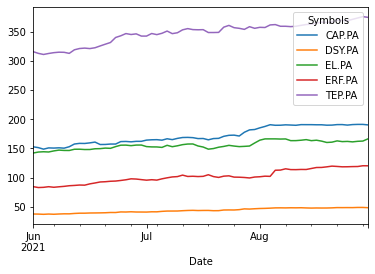

In [17]:
def recherche_best_action_ReventeSimu(df, nbr=1, q=1.0, inc=0):
    unitary_q = 1 / len(df.index)
    q -= unitary_q
    print(f"incrément = {inc}\nq = {q}")
    # Liste meilleur en frequence
    best_F = df[df['Frequence'] >= df['Frequence'].quantile(q)].index
    # Liste meilleur en gain avec vente optimale mise de 100 à chaque achat
    best_G = df[df['Gain-avVenteOpti'] >= df['Gain-avVenteOpti'].quantile(q)].index
    # Liste meilleur en gain vente si baisse sur 2 jours et rachat si remonte
    best_GSimuVente = df[df['Gain-VenteSimu'] >= df['Gain-VenteSimu'].quantile(q)].index
    # Liste meilleur en gain sans vente
    best_GssVente = df[df['Gain-ssVente'] >= df['Gain-ssVente'].quantile(q)].index
    # Liste meilleur en croissance
    low_Mpos = df[df['Moy_pos'] <= df['Moy_pos'].quantile(1-q)].index
    high_Mpos = df[df['Moy_pos'] >= df['Moy_pos'].quantile(q)].index
    # Liste meilleur en décroissance
    low_Mneg = df[df['Moy_neg'] <= df['Moy_neg'].quantile(1-q)].index
    high_Mneg = df[df['Moy_neg'] >= df['Moy_neg'].quantile(q)].index
    
    print(f"best_F = {best_F}\nbest_G = {best_G}\nbest_GssVente = {best_GssVente}\nbest_GSimuVente = {best_GSimuVente}\n"
          f"high_Mpos = {high_Mpos}\nlow_Mpos = {low_Mpos}\nlow_Mneg = {low_Mneg}\nhigh_Mneg = {high_Mneg}")

    if len(best_F) > nbr - 1:
        return best_F.values
    else:
        inc += 1
        return recherche_best_action_ssRevente(df, nbr, q, inc)
    
the_action = recherche_best_action_ssRevente(df_selection, 5)
print(f"the_action : {the_action}")
df['Close'][the_action].plot()
print(df_selection.loc[the_action])

In [18]:
# Total gain
print(f"Comptabilisation gain positif :\n"
      f"    Sans Vente : {df_selection[df_selection['Gain-ssVente'] >= df_selection['Gain-ssVente'].quantile(0.9)]['Gain-ssVente'].sum()}\n"
      f"    Sans Vente : {df_selection[df_selection['Gain-ssVente'] >= df_selection['Gain-ssVente'].quantile(0.9)]['Gain-ssVente']}\n"
      f"    Vente Opti : {df_selection[df_selection['Gain-avVenteOpti'] >= df_selection['Gain-avVenteOpti'].quantile(0.9)]['Gain-avVenteOpti'].sum()}\n"
      f"    Vente Opti : {df_selection[df_selection['Gain-avVenteOpti'] >= df_selection['Gain-avVenteOpti'].quantile(0.9)]['Gain-avVenteOpti']}\n"
      f"    Vente Simu : {df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.9)]['Gain-VenteSimu'].sum()}\n"
      f"    Vente Simu : {df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.9)]['Gain-VenteSimu']}\n"
      f"    Vente Simu1 : {df_selection[df_selection['Gain-VenteSimu1'] >= df_selection['Gain-VenteSimu1'].quantile(0.9)]['Gain-VenteSimu1'].sum()}\n"
      f"    Vente Simu1 : {df_selection[df_selection['Gain-VenteSimu1'] >= df_selection['Gain-VenteSimu1'].quantile(0.9)]['Gain-VenteSimu1']}\n"
      f"    Liste Vente Simu : {df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.9)]['Gain-VenteSimu'].index}\n"
      f"    Nbr Vente Simu : {len(df_selection[df_selection['Gain-VenteSimu'] >= df_selection['Gain-VenteSimu'].quantile(0.9)]['Gain-VenteSimu'].index)}")


Comptabilisation gain positif :
    Sans Vente : 119.38232768646174
    Sans Vente : Symbols
CAP.PA    24.606806
DSY.PA    28.882073
ERF.PA    42.359222
STM.PA    23.534226
Name: Gain-ssVente, dtype: float64
    Vente Opti : 235.06741493360005
    Vente Opti : Symbols
MT.AS     66.112320
ERF.PA    55.550631
STM.PA    52.484080
URW.AS    60.920384
Name: Gain-avVenteOpti, dtype: float64
    Vente Simu : 100.9248187854106
    Vente Simu : Symbols
CAP.PA    22.578797
DSY.PA    25.484271
ERF.PA    34.512943
STM.PA    18.348808
Name: Gain-VenteSimu, dtype: float64
    Vente Simu1 : 53.199355825783016
    Vente Simu1 : Symbols
CAP.PA    11.710529
DSY.PA    11.670373
EL.PA     11.491674
ERF.PA    18.326780
Name: Gain-VenteSimu1, dtype: float64
    Liste Vente Simu : Index(['CAP.PA', 'DSY.PA', 'ERF.PA', 'STM.PA'], dtype='object', name='Symbols')
    Nbr Vente Simu : 4
